# Milestone 1 - EDA and Preprocessing data

# 1 - Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

In [2]:
df= pd.read_csv(r'D:\Semester 9\Data Engineering\M1\green_tripdata_2019-10.csv')
df.head(8)

C:\Users\2018\AppData\Local\Temp\ipykernel_9336\1197341186.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r'D:\Semester 9\Data Engineering\M1\green_tripdata_2019-10.csv')


,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,VeriFone Inc.,2019-10-01 00:26:02,2019-10-01 00:39:58,N,Standard rate,"Brooklyn,Greenpoint","Queens,Rego Park",1.0,5.88,18.0,0.50,0.5,0.00,0.0,NaN,0.3,19.30,Cash,Street-hail,0.0
1,"Creative Mobile Technologies, LLC",2019-10-01 00:18:11,2019-10-01 00:22:38,N,Standard rate,"Manhattan,Central Park","Manhattan,Yorkville West",1.0,0.80,5.0,3.25,0.5,0.00,0.0,NaN,0.3,9.05,Cash,Street-hail,0.0
2,"Creative Mobile Technologies, LLC",2019-10-01 00:09:31,2019-10-01 00:24:47,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Sunset Park West",2.0,7.50,21.5,0.50,0.5,0.00,0.0,NaN,0.3,22.80,Cash,Street-hail,0.0
3,"Creative Mobile Technologies, LLC",2019-10-01 00:37:40,2019-10-01 00:41:49,N,Standard rate,"Brooklyn,Park Slope","Brooklyn,Park Slope",1.0,0.90,5.5,0.50,0.5,0.00,0.0,NaN,0.3,6.80,NaN,Street-hail,0.0
4,VeriFone Inc.,2019-10-01 00:08:13,2019-10-01 00:17:56,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Prospect-Lefferts Gardens",1.0,2.52,10.0,0.50,0.5,2.26,0.0,NaN,0.3,13.56,Credit card,Street-hail,0.0
5,VeriFone Inc.,2019-10-01 00:35:01,2019-10-01 00:43:40,N,Standard rate,"Brooklyn,Downtown Brooklyn/MetroTech","Brooklyn,Clinton Hill",1.0,1.47,8.0,0.50,0.5,1.86,0.0,NaN,0.3,11.16,Credit card,Street-hail,0.0
6,"Creative Mobile Technologies, LLC",2019-10-01 00:28:09,2019-10-01 00:30:49,N,Standard rate,"Queens,Astoria","Queens,Old Astoria",1.0,0.60,4.0,0.50,0.5,1.00,0.0,NaN,0.3,6.30,Credit card,Street-hail,0.0
7,VeriFone Inc.,2019-10-01 00:28:26,2019-10-01 00:32:01,N,Standard rate,"Manhattan,Central Harlem","Manhattan,East Harlem North",1.0,0.56,4.5,0.50,0.5,0.00,0.0,NaN,0.3,5.80,Cash,Street-hail,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476402 entries, 0 to 476401
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Vendor                 476402 non-null  object 
 1   lpep pickup datetime   476402 non-null  object 
 2   lpep dropoff datetime  476402 non-null  object 
 3   store and fwd flag     387022 non-null  object 
 4   Rate type              476402 non-null  object 
 5   PU Location            476402 non-null  object 
 6   DO Location            476402 non-null  object 
 7   passenger count        386179 non-null  float64
 8   trip distance          476402 non-null  float64
 9   fare amount            476402 non-null  float64
 10  extra                  271312 non-null  float64
 11  mta tax                476402 non-null  float64
 12  tip amount             476402 non-null  float64
 13  tolls amount           476402 non-null  float64
 14  ehail fee              0 non-null   

In [4]:
df.describe()

,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,congestion surcharge
count,386179.000000,476402.000000,476402.000000,271312.000000,476402.000000,476402.000000,476402.000000,0.0,476402.000000,476402.000000,387022.000000
mean,1.319696,3.543604,15.782604,1.482953,0.486164,0.983039,0.317712,NaN,0.240393,18.985995,0.451298
std,2.387031,4.168397,14.100603,1.147153,0.089724,1.981924,2.177608,NaN,0.121326,15.620924,1.018528
min,1.000000,-6.930000,-200.000000,-4.500000,-0.500000,-80.800000,-12.500000,NaN,-0.300000,-200.000000,-2.750000
25%,1.000000,1.100000,7.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,9.000000,0.000000
50%,1.000000,2.070000,11.500000,1.000000,0.500000,0.000000,0.000000,NaN,0.300000,14.160000,0.000000
75%,1.000000,4.270000,20.730000,2.750000,0.500000,1.650000,0.000000,NaN,0.300000,24.620000,0.000000
max,555.000000,515.890000,2877.500000,8.250000,0.500000,158.520000,935.500000,NaN,0.300000,2878.300000,2.750000


# 2) Visualisation with a bit of cleaning


In [4]:
def plot_bar(data,title,xlabel=None,ylabel=None):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.barplot(x=data.index,y=data)
    plt.xticks(rotation=45)
    plt.show()

In [5]:
def line_plot(x,y,data,title,xlabel,ylabel):
    plt.figure(figsize=(14,6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.lineplot(x=x, y=y, data=data)
    plt.xticks(rotation=90)
    plt.show()

In [6]:
def box_plot(x,data):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=x, data=data)
    plt.title('Fare Amount')
    plt.show()

In [7]:
def strip_plot(x, y, title, xlabel, ylabel, sample_size=None):
    if sample_size is not None and len(x) > sample_size:
        indices = random.sample(range(len(x)), sample_size)
        x = [x[i] for i in indices]
        y = [y[i] for i in indices]

    plt.figure(figsize=(14, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,400)
    
    sns.stripplot(x=x, y=y, jitter=True, size=3)  # Adjust size as needed
    plt.show()

In [8]:
def lm_plot(x,y,hue,data,title,xlabel,ylabel):

    plot=sns.lmplot(x=x, y=y,hue=hue, data=data)
    plot.fig.suptitle(title)
    plot.set_axis_labels(xlabel, ylabel)

In [9]:
def joint_plot(x, y, kind,title, xlabel, ylabel, x_limit, y_limit, sample_size=None,):
    if sample_size is not None and len(x) > sample_size:
        indices = random.sample(range(len(x)), sample_size)
        x = [x[i] for i in indices]
        y = [y[i] for i in indices]

  
    plot = sns.jointplot(x=x, y=y, kind=kind)

    plot.fig.suptitle(title)
    plot.set_axis_labels(xlabel, ylabel)
    if x_limit is not None:
        plot.ax_joint.set_xlim(x_limit)
    if y_limit is not None:
        plot.ax_joint.set_ylim(y_limit)

In [10]:
def reg_plot(x, y,title, xlabel, ylabel, x_limit=None, y_limit=None, sample_size=None,):
    if sample_size is not None and len(x) > sample_size:
        indices = random.sample(range(len(x)), sample_size)
        x = [x[i] for i in indices]
        y = [y[i] for i in indices]

  
    plot = sns.regplot(x=x, y=y)

      
    plot.set_title(title) 
    plot.set_xlabel(xlabel)  
    plot.set_ylabel(ylabel)  

    if x_limit is not None:
        plot.set_xlim(x_limit)
    if y_limit is not None:
        plot.set_ylim(y_limit)

In [11]:
def heat_map(data):
    correlation=data.corr(numeric_only=True)
    plt.figure(figsize=(14,6))
    sns.heatmap(data=correlation, annot=True,cmap="YlGnBu", vmin=-1, vmax=1, linewidths=.2)
    plt.show()

In [12]:
def kde_plot(data,x,title, x_limit=None, y_limit=None, hue=None):
    
    plt.title(title)
    plot=sns.kdeplot(data=data, x=x, hue=hue, fill=True)
    if x_limit is not None:
        plot.set_xlim(x_limit)
    if y_limit is not None:
        plot.set_ylim(y_limit)
    plt.show()

In [13]:
def histogram(data,x,title,xlabel,ylabel,hue=None):
    plt.figure(figsize=(14, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.histplot(data=data, x=x, hue=hue)
    plt.xticks(rotation=45)
    plt.show()

In [14]:
def pickup_date(date):
    return date.split(' ')[0]

In [15]:
df_new=df.copy()
df_new=df_new.assign(date= df_new['lpep pickup datetime'].apply(pickup_date))
df_new.head(7)

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,...,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge,date
0,VeriFone Inc.,2019-10-01 00:26:02,2019-10-01 00:39:58,N,Standard rate,"Brooklyn,Greenpoint","Queens,Rego Park",1.0,5.88,18.0,...,0.5,0.00,0.0,NaN,0.3,19.30,Cash,Street-hail,0.0,2019-10-01
1,"Creative Mobile Technologies, LLC",2019-10-01 00:18:11,2019-10-01 00:22:38,N,Standard rate,"Manhattan,Central Park","Manhattan,Yorkville West",1.0,0.80,5.0,...,0.5,0.00,0.0,NaN,0.3,9.05,Cash,Street-hail,0.0,2019-10-01
2,"Creative Mobile Technologies, LLC",2019-10-01 00:09:31,2019-10-01 00:24:47,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Sunset Park West",2.0,7.50,21.5,...,0.5,0.00,0.0,NaN,0.3,22.80,Cash,Street-hail,0.0,2019-10-01
3,"Creative Mobile Technologies, LLC",2019-10-01 00:37:40,2019-10-01 00:41:49,N,Standard rate,"Brooklyn,Park Slope","Brooklyn,Park Slope",1.0,0.90,5.5,...,0.5,0.00,0.0,NaN,0.3,6.80,NaN,Street-hail,0.0,2019-10-01
4,VeriFone Inc.,2019-10-01 00:08:13,2019-10-01 00:17:56,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Prospect-Lefferts Gardens",1.0,2.52,10.0,...,0.5,2.26,0.0,NaN,0.3,13.56,Credit card,Street-hail,0.0,2019-10-01
5,VeriFone Inc.,2019-10-01 00:35:01,2019-10-01 00:43:40,N,Standard rate,"Brooklyn,Downtown Brooklyn/MetroTech","Brooklyn,Clinton Hill",1.0,1.47,8.0,...,0.5,1.86,0.0,NaN,0.3,11.16,Credit card,Street-hail,0.0,2019-10-01
6,"Creative Mobile Technologies, LLC",2019-10-01 00:28:09,2019-10-01 00:30:49,N,Standard rate,"Queens,Astoria","Queens,Old Astoria",1.0,0.60,4.0,...,0.5,1.00,0.0,NaN,0.3,6.30,Credit card,Street-hail,0.0,2019-10-01


#

**We'll start by inspecting the relation between the vendor & the fare amount.**

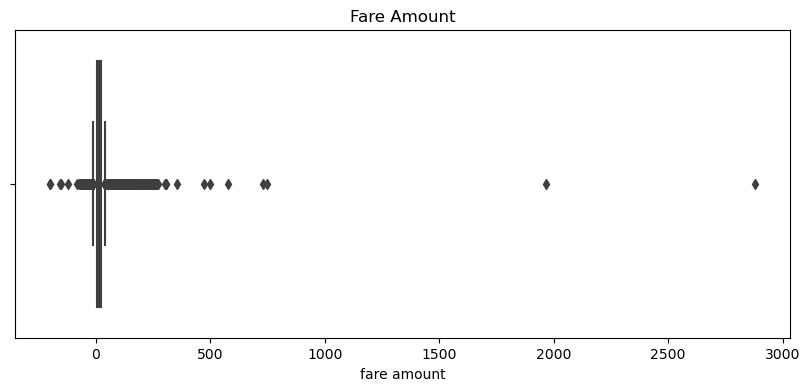

In [42]:
box_plot(df_new['fare amount'], df_new)

#
**By disregarding the outliers for now, we can see that the fare amount mostly lies between 0 & 400.**

In [43]:
fare_amount_min=df_new['fare amount'].min()
fare_amount_1percent_quantile=df_new['fare amount'].quantile(0.01)
fare_amount_min,fare_amount_1percent_quantile

(-200.0, 2.5)

**We can see from the previous cell that our min value is negative, however our 1% quantile is +ve, therefore we can also neglect this -200 for now and again our range (0,400) seems to be good**

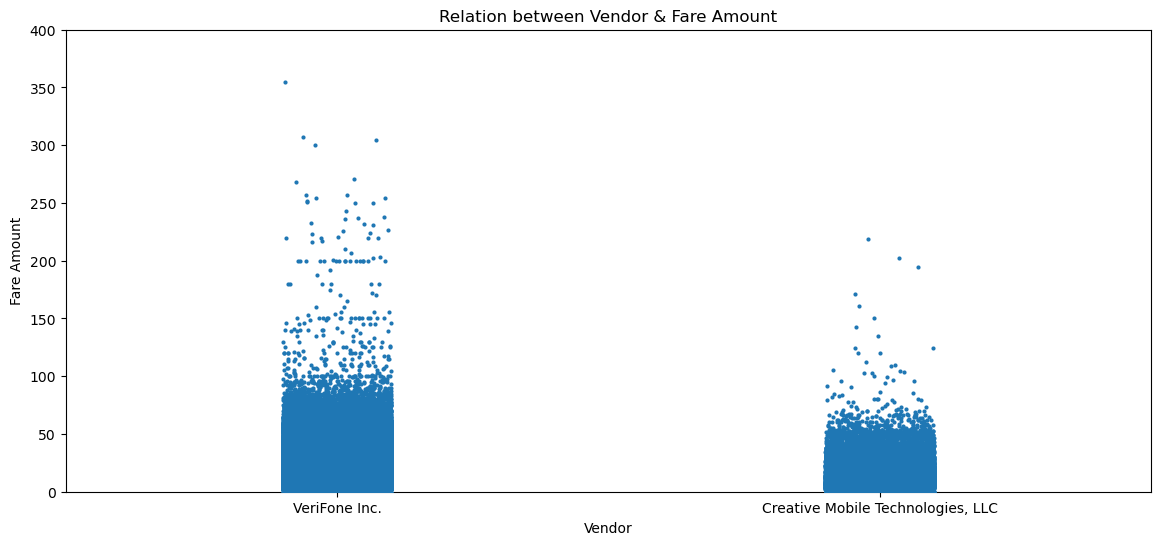

In [16]:
strip_plot(df_new['Vendor'], df_new['fare amount'], 'Relation between Vendor & Fare Amount', 'Vendor', 'Fare Amount', sample_size=400000)

#
**Apparently, "VeriFone Inc." vendor usually has a higher fare amount.**

In [17]:
#We can confirm this observation using this line.
df_new[["Vendor", "fare amount"]].groupby(['Vendor'], as_index=False).mean().sort_values(by='fare amount', ascending=False)

,Vendor,fare amount
1,VeriFone Inc.,16.151765
0,"Creative Mobile Technologies, LLC",13.422321


**Now we'll explore the relation between rate type and fare amount.**

In [17]:
df['Rate type'].unique()
ratetype_vs_fareamount= df[['Rate type', 'fare amount']].groupby('Rate type')['fare amount'].mean()

ratetype_vs_fareamount

Rate type
Group ride                2.500000
JFK                      49.823129
Nassau or Westchester    65.156740
Negotiated fare          21.990953
Newark                   53.145238
Standard rate            12.159981
Unknown                  29.803240
Name: fare amount, dtype: float64

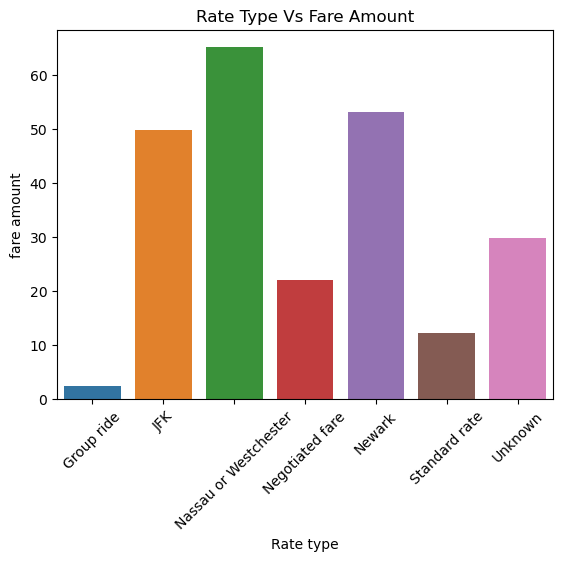

In [137]:
plot_bar(ratetype_vs_fareamount,'Rate Type Vs Fare Amount',
         'Rate Type','Fare Amount')

#
**We can tell by looking at the previous graph that group rides are by far the cheapest, while "Nassau or Westchester" is the most pricey.**

**We'll try to do now some trend analysis now to detect any possible pattern.**

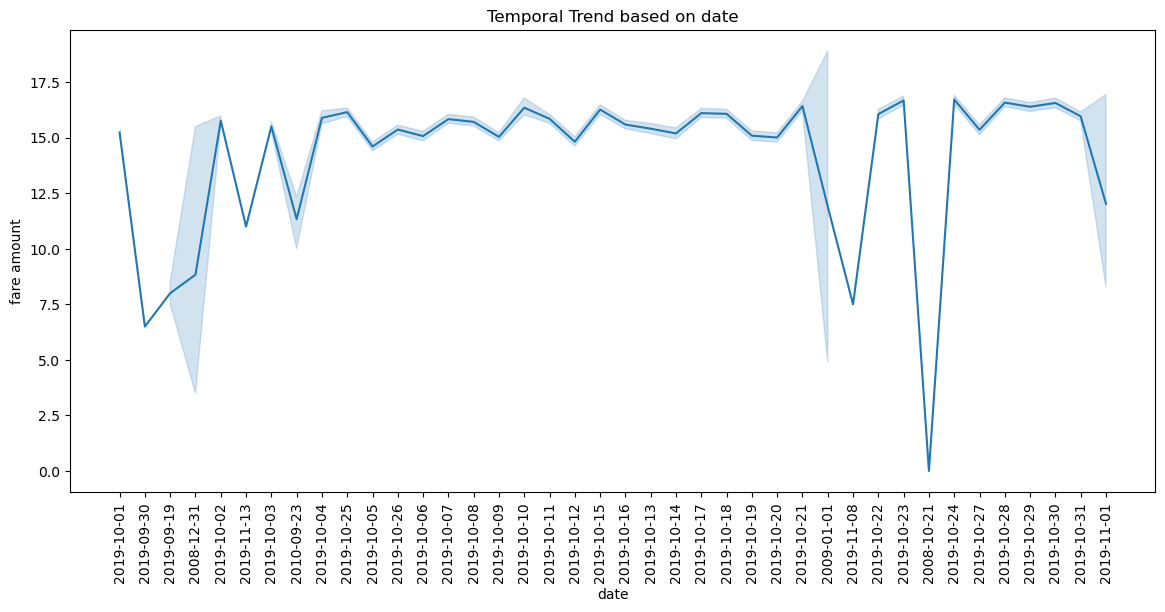

In [20]:
line_plot(df_new['date'], df_new['fare amount'], df_new, "Temporal Trend based on date", 'date', 'fare amount')

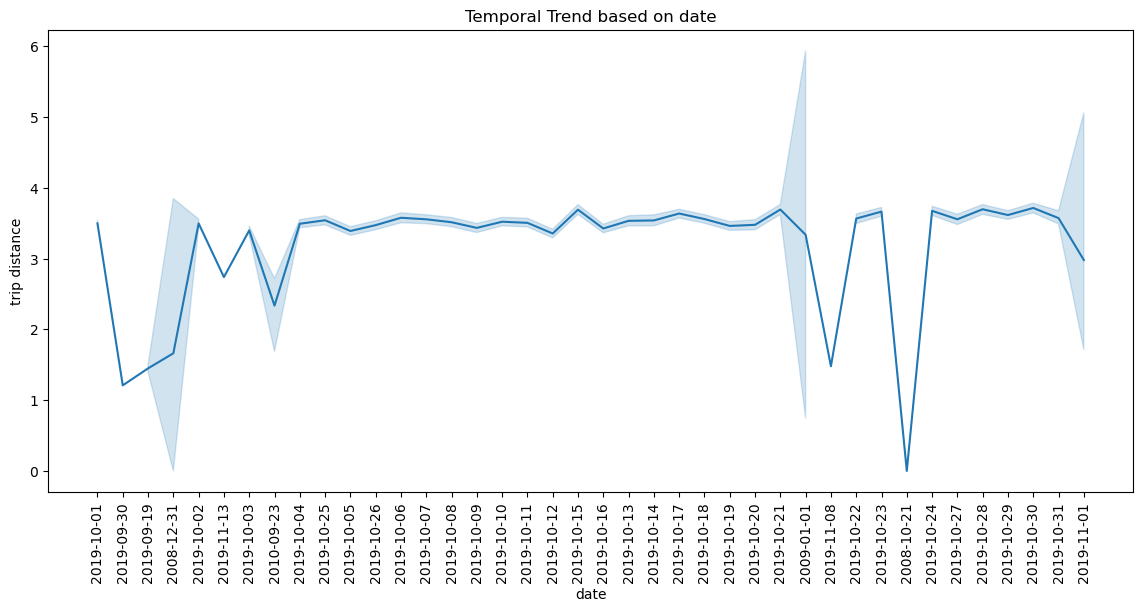

In [21]:
line_plot(df_new['date'], df_new['trip distance'], df_new, "Temporal Trend based on date", 'date', 'trip distance')

**First, we can observe that the date column has some wrong dates and needs to be cleaned. Some are in september & November 2019 instead of October, and some are even in 2008!!**

In [16]:
df_new['hour']=pd.to_datetime(df_new['lpep pickup datetime']).dt.hour
df_new['day_of_week']=pd.to_datetime(df_new['lpep pickup datetime']).dt.dayofweek

df_new.sample()

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,...,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge,date,hour,day_of_week
427144,VeriFone Inc.,2019-10-16 14:55:00,2019-10-16 15:35:00,NaN,Unknown,"Manhattan,Morningside Heights","Manhattan,Upper East Side North",NaN,3.04,18.85,...,0.0,NaN,0.0,22.1,Unknown,Unknown,NaN,2019-10-16,14,2


In [17]:
def is_wrong_date(date_str):
    date = pd.to_datetime(date_str)
    return date.month != 10 or date.year!=2019

# Count the number of wrong dates
wrong_pudates_count = df_new['lpep pickup datetime'].apply(is_wrong_date).sum()
wrong_dodates_count = df_new['lpep dropoff datetime'].apply(is_wrong_date).sum()
wrong_dodates_count = df_new['date'].apply(is_wrong_date).sum()

wrong_pudates_count, wrong_dodates_count

(38, 38)

**Since some of these dates aren't in October or even in 2019, we're left with no option but to drop them.**

In [18]:
#keeping only the rows with the month=10 & year=2019
df_new=df_new[~df_new['lpep pickup datetime'].apply(is_wrong_date)]
df_new=df_new[~df_new['lpep dropoff datetime'].apply(is_wrong_date)]
df_new=df_new[~df_new['date'].apply(is_wrong_date)]


df_new.shape

(476206, 23)

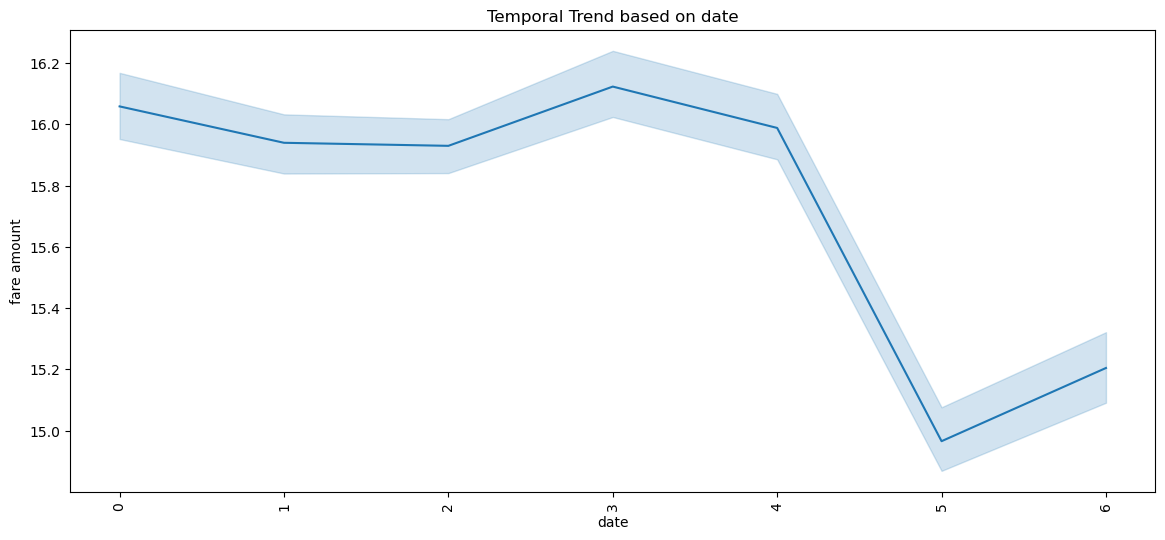

In [30]:
line_plot(df_new['day_of_week'], df_new['fare amount'], df_new, "Temporal Trend based on date", 'date', 'fare amount')

**We can see from the previous graph that the fare usually reaches its peak on Thursday, while it's the lowest on Saturday.**

**And in general, the fare amount is much higher on the week days than in the weekends.**

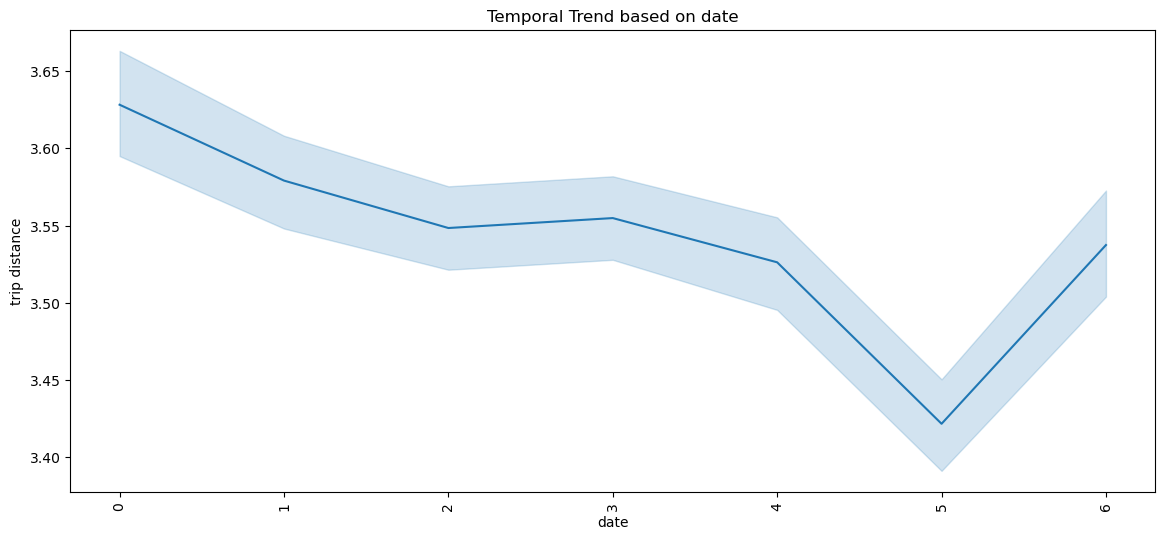

In [31]:
line_plot(df_new['day_of_week'], df_new['trip distance'], df_new, "Temporal Trend based on date", 'date', 'trip distance')

**Similarly, the trip distance is usually higher during the week days.**

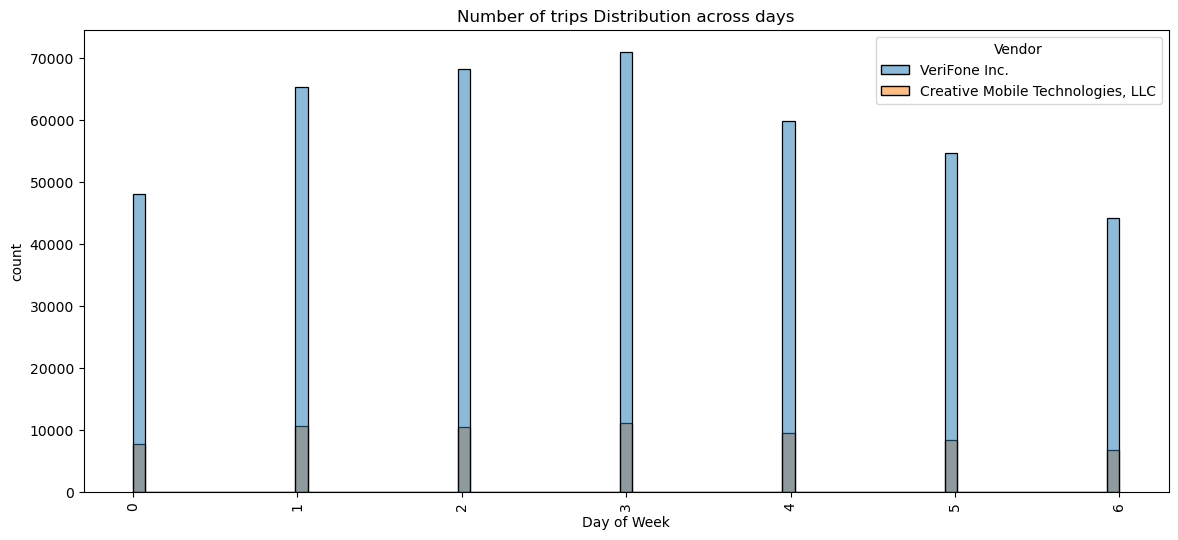

In [35]:
histogram(df_new,'day_of_week', "Number of trips Distribution across days", 'Day of Week', "count", df_new['Vendor'])

#
**The number of trips is the lowest at the beginning of the week on Monday, and then increases gradually till Thursday "peak",
and starts to decrease again.
It has a perfect bell shape and apparently it follows a normal distribution.**

In [37]:
#To make sure that it follows a normal dist.
df_new['day_of_week'].skew()

0.08980601458299535

#
**Almost Ideal.**

**Also, it's obvious that the total number of trips recorded by "VeriFone" vendor is much higher than of the other vendor.**

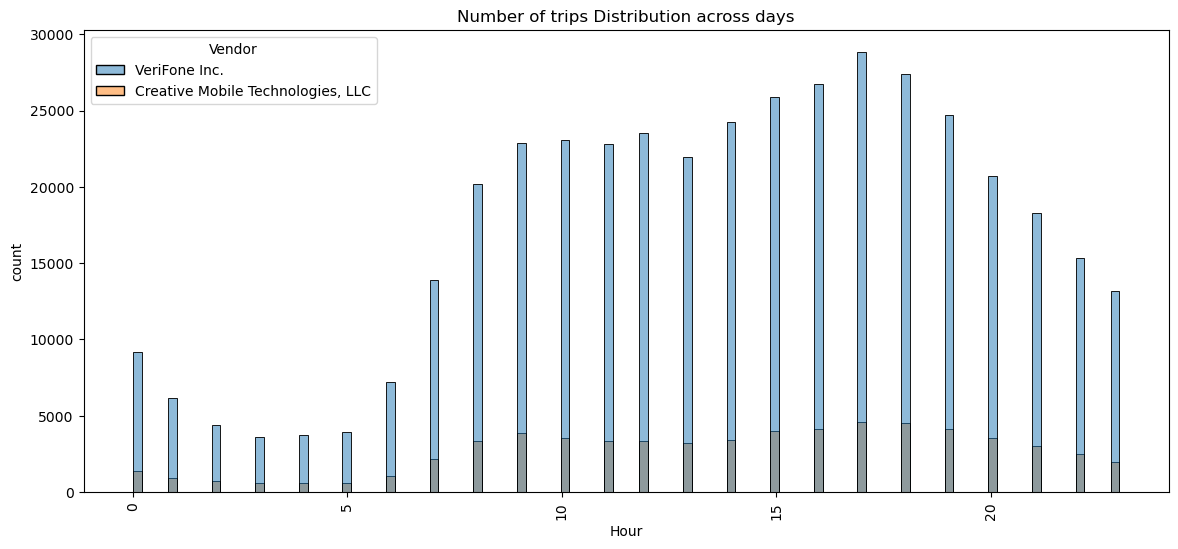

In [39]:
histogram(df_new,'hour', "Number of trips Distribution across days", 'Hour', "count",df_new['Vendor'])

#
**The number of trips is low in the early morning, and then increases till it reaches its peak @5pm before decreasing again.**

In [23]:
mean_distance_per_day=df_new[['trip distance','day_of_week']].groupby('day_of_week',as_index=False).mean().sort_values(by='trip distance', ascending=False)
mean_distance_per_hour=df_new[['trip distance','hour']].groupby('hour',as_index=False).mean().sort_values(by='trip distance', ascending=False)

mean_distance_per_day,mean_distance_per_hour

(   day_of_week  trip distance
 0            0       3.628240
 1            1       3.579117
 3            3       3.554845
 2            2       3.548410
 6            6       3.537394
 4            4       3.526200
 5            5       3.421653,
     hour  trip distance
 6      6       6.377170
 5      5       6.088464
 7      7       4.334158
 4      4       4.190053
 11    11       3.844867
 13    13       3.816575
 12    12       3.812084
 10    10       3.801782
 8      8       3.725138
 15    15       3.705274
 14    14       3.697260
 16    16       3.665898
 9      9       3.655227
 3      3       3.369249
 17    17       3.209622
 23    23       3.122646
 22    22       3.110772
 21    21       3.097378
 20    20       2.999961
 2      2       2.981547
 0      0       2.980994
 19    19       2.932365
 18    18       2.931501
 1      1       2.833393)

**The longest distances are usually covered at the beginning of the week on Monday & Tuesday.**
**Also the peak hours when the trip distance is the longest are in the early morning around 5 & 6am, while the least around 1am.**

#


**Exploring the most frequent pick-up locations.**

In [29]:
locations=df_new['PU Location'].nunique()
top_locations_series= df_new['PU Location'].value_counts()[:5]
locations, top_locations_series

(255,
 Manhattan,East Harlem North      37354
 Manhattan,East Harlem South      29624
 Manhattan,Central Harlem         25351
 Queens,Elmhurst                  20853
 Manhattan,Morningside Heights    19823
 Name: PU Location, dtype: int64)

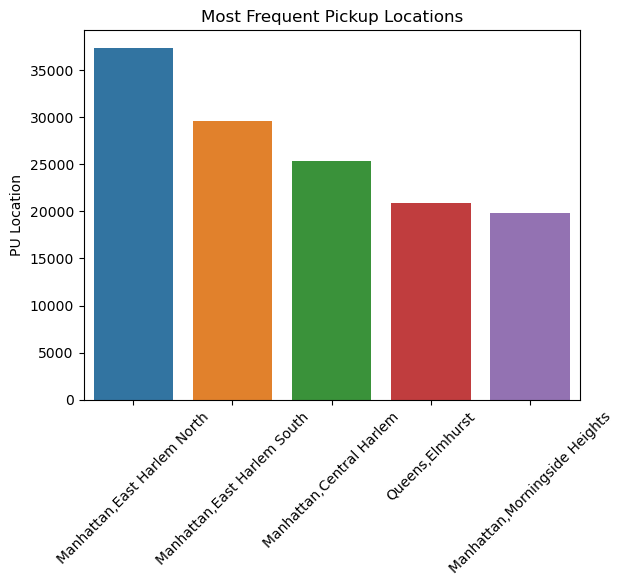

In [30]:
plot_bar(top_locations_series,'Most Frequent Pickup Locations')

****

***Although trip distance and fare amount are definitely highly correlated, we'll see whether we can get any further insights fromt their graphs.****

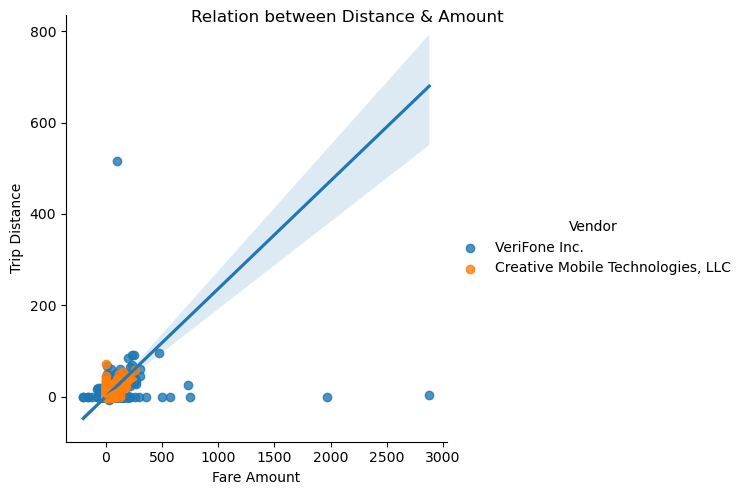

In [15]:
lm_plot('fare amount','trip distance',  'Vendor', df_new,'Relation between Distance & Amount',  "Fare Amount",'Trip Distance')

# 
**Certainly the distance is directly proportional to the fare amount, yet we can observe that "VeriFone" vendor has on average much greater trip distances and hence larger fare amounts.** 

In [46]:
#We can also confirm this observation using this line.
df_new[["Vendor", "trip distance"]].groupby(['Vendor'], as_index=False).mean().sort_values(by='trip distance', ascending=False)

,Vendor,trip distance
1,VeriFone Inc.,3.716056
0,"Creative Mobile Technologies, LLC",2.433719


**Another graph to help us a bit in the visualisation process.**

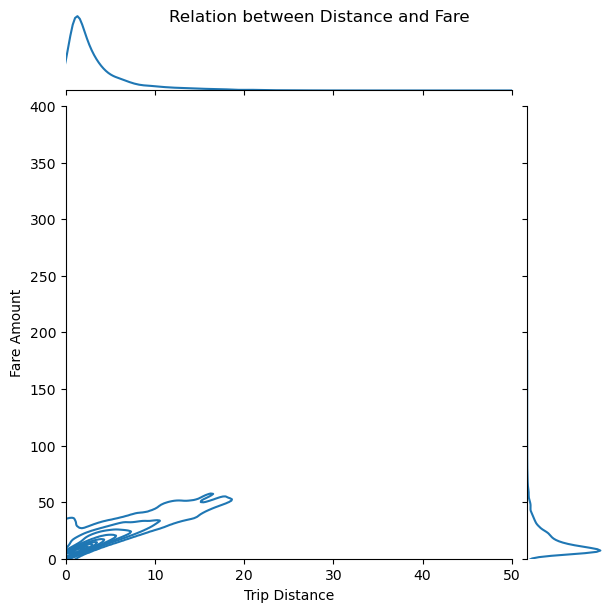

In [16]:
joint_plot(df_new['trip distance'], df_new['fare amount'], 'kde',"Relation between Distance and Fare","Trip Distance","Fare Amount", (0,50),(0,400),10000)

#


**Anf now, is there any relation between the tolls amount & the distance?**

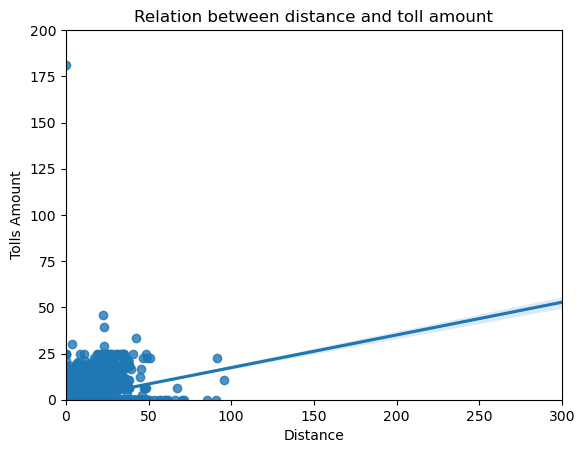

In [17]:
reg_plot(df_new['trip distance'], df_new['tolls amount'], "Relation between distance and toll amount", "Distance", "Tolls Amount",(0,300),(0,200))

#
**The tolls amount isn't exactly directly proportional with the distance, they're mostly clustered within 50m.**

#
**However we could've gathered most of these insights with a quick look at our heat map & correlation matrix.**

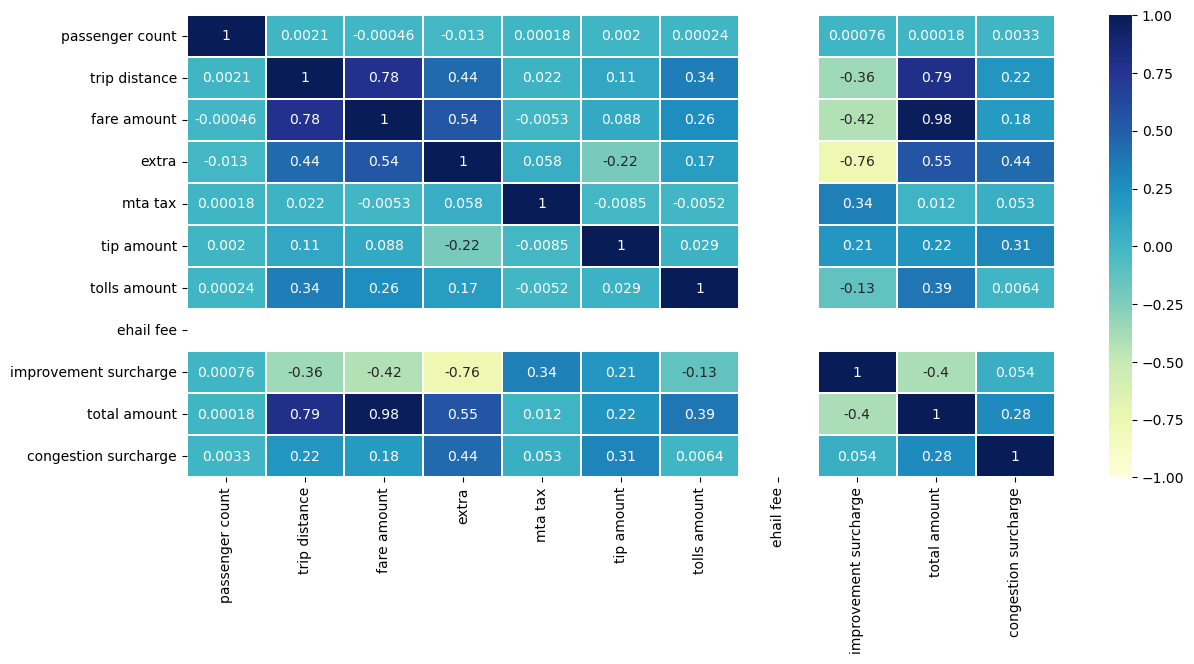

In [19]:
heat_map(df_new)


**Finally, we'll focus a bit on the passenger count and its distribution.**

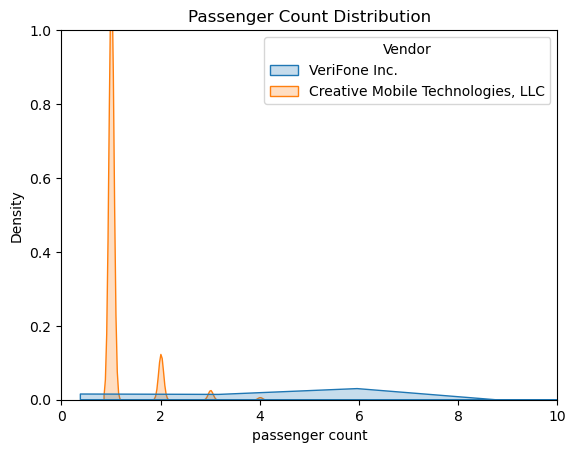

In [20]:
kde_plot(df_new,'passenger count',"Passenger Count Distribution", (0,10), (0,1),'Vendor')

#
**More passengers are in the trips recorded by "VeriFone" vendor.**

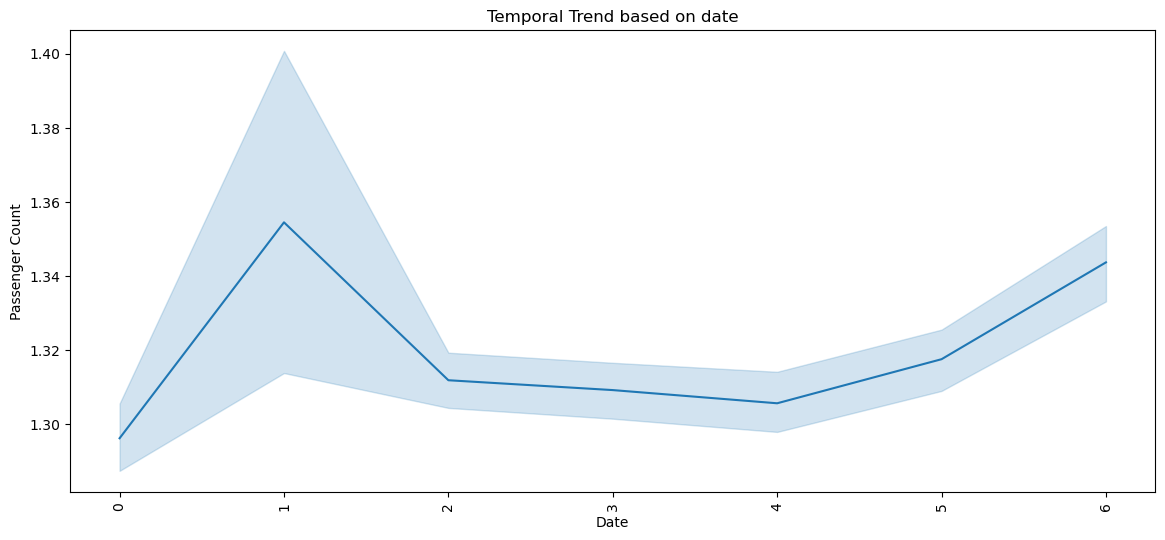

In [25]:
line_plot(df_new['day_of_week'], df_new['passenger count'], df_new, "Temporal Trend based on date", 'Date', 'Passenger Count')

**The highest passenger count is usually recorded on Tuesdays.**



#
**Inspecting the relation between no. of passengers & tip amount.**

In [26]:
tip_series=df_new[['tip amount','passenger count']].groupby('passenger count').mean().sort_values(by='tip amount', ascending=False)
tip_series

,tip amount
passenger count,
9.0,6.000000
7.0,3.444615
5.0,1.324413
4.0,1.318383
6.0,1.297224
2.0,1.246771
1.0,1.202154
3.0,1.046124
8.0,0.781818


In [27]:
payment_series=df_new[['payment type','tip amount']].groupby('payment type').mean().sort_values(by='tip amount', ascending=False)
payment_series

,tip amount
payment type,
Credit card,2.192301
Unknown,0.006006
Cash,0.000088
Uknown,0.000000
Dispute,-0.003464
No charge,-0.053089


#
**Tip amount is added to the total amount if the payment method is "credit card".**

In [28]:
#Which payment method is more popular among each vendor? 
Vendor_payment_series=df_new[['Vendor','payment type']].groupby('Vendor', as_index=False).apply(lambda x: x.mode().max())\
.sort_values(by= 'payment type', ascending = False)

Vendor_payment_series

,Vendor,payment type
0,"Creative Mobile Technologies, LLC",Credit card
1,VeriFone Inc.,Credit card


#
**Both vendors' passengers usually pay with credit cards.**

# Data Cleaning

**In the previous section, we've cleaned the pickup/ dropoff date columns by first converting them to datetime type, we then removed the wrong/unrelated dates and finally we've created 2 more columns representing the "date_of_week" & "hour".**


**However, other things still need to be claned as well.**

In [19]:
def drop_duplicates(df):
    df=df.drop_duplicates()
    return df

In [20]:
duplicates=df_new[df_new.duplicated()]
print(duplicates)
print(df_new.duplicated().sum())

               Vendor lpep pickup datetime lpep dropoff datetime  \
476392  VeriFone Inc.  2019-10-24 00:14:51   2019-10-24 00:20:56   
476393  VeriFone Inc.  2019-10-22 19:00:28   2019-10-22 19:16:30   
476394  VeriFone Inc.  2019-10-16 20:33:18   2019-10-16 20:35:41   
476395  VeriFone Inc.  2019-10-04 09:57:00   2019-10-04 10:39:00   
476396  VeriFone Inc.  2019-10-08 19:49:45   2019-10-08 19:52:45   
476397  VeriFone Inc.  2019-10-19 21:00:43   2019-10-19 21:11:59   
476398  VeriFone Inc.  2019-10-23 15:15:00   2019-10-23 15:31:33   
476399  VeriFone Inc.  2019-10-05 07:21:17   2019-10-05 07:39:15   
476400  VeriFone Inc.  2019-10-03 16:07:29   2019-10-03 16:19:59   
476401  VeriFone Inc.  2019-10-07 17:07:53   2019-10-07 17:12:30   

       store and fwd flag      Rate type                     PU Location  \
476392                  N  Standard rate            Bronx,West Concourse   
476393                  N  Standard rate                 Queens,Flushing   
476394                 

In [21]:
df_no_duplicates=drop_duplicates(df_new)
print(df_no_duplicates.duplicated().sum())

0


In [22]:
def rename_columns(df):
    df.columns = df.columns.str.lower()
    df.columns = [col.replace(' ', '_') for col in df.columns]

In [23]:
rename_columns(df_no_duplicates)
df_new.columns

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge',
       'date', 'hour', 'day_of_week'],
      dtype='object')

#

**>>>Cleaning the "trip_distance" column.**

In [38]:
df_no_duplicates[df_no_duplicates['trip_distance']<0].count()

vendor                   2
lpep_pickup_datetime     2
lpep_dropoff_datetime    2
store_and_fwd_flag       0
rate_type                2
pu_location              2
do_location              2
passenger_count          0
trip_distance            2
fare_amount              2
extra                    2
mta_tax                  2
tip_amount               2
tolls_amount             2
ehail_fee                0
improvement_surcharge    2
total_amount             2
payment_type             2
trip_type                2
congestion_surcharge     0
date                     2
hour                     2
day_of_week              2
dtype: int64

**Distances can never be negative, therefore we'll convert these values to 0.**

In [24]:
df_no_duplicates.loc[df_no_duplicates['trip_distance']<0, 'trip_distance']=0

In [40]:
df_no_duplicates['fare_amount'].unique()

array([ 18.  ,   5.  ,  21.5 , ...,  49.08, -32.44,  60.15])

# Observing & Handling Missing Data

In [41]:
perc_mean_null=df_no_duplicates.isnull().mean()*100
perc_mean_null

vendor                     0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag        18.768952
rate_type                  0.000000
pu_location                0.000000
do_location                0.000000
passenger_count           18.945980
trip_distance              0.000000
fare_amount                0.000000
extra                     43.056431
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               2.267134
trip_type                  0.000000
congestion_surcharge      18.768952
date                       0.000000
hour                       0.000000
day_of_week                0.000000
dtype: float64

In [25]:
#Since the "ehail" column is 100% empty, it needs to be dropped. (MNAR)
df_no_duplicates=df_no_duplicates.drop('ehail_fee',axis=1)
df_no_duplicates.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,date,hour,day_of_week
0,VeriFone Inc.,2019-10-01 00:26:02,2019-10-01 00:39:58,N,Standard rate,"Brooklyn,Greenpoint","Queens,Rego Park",1.0,5.88,18.0,...,0.00,0.0,0.3,19.30,Cash,Street-hail,0.0,2019-10-01,0,1
1,"Creative Mobile Technologies, LLC",2019-10-01 00:18:11,2019-10-01 00:22:38,N,Standard rate,"Manhattan,Central Park","Manhattan,Yorkville West",1.0,0.80,5.0,...,0.00,0.0,0.3,9.05,Cash,Street-hail,0.0,2019-10-01,0,1
2,"Creative Mobile Technologies, LLC",2019-10-01 00:09:31,2019-10-01 00:24:47,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Sunset Park West",2.0,7.50,21.5,...,0.00,0.0,0.3,22.80,Cash,Street-hail,0.0,2019-10-01,0,1
3,"Creative Mobile Technologies, LLC",2019-10-01 00:37:40,2019-10-01 00:41:49,N,Standard rate,"Brooklyn,Park Slope","Brooklyn,Park Slope",1.0,0.90,5.5,...,0.00,0.0,0.3,6.80,NaN,Street-hail,0.0,2019-10-01,0,1
4,VeriFone Inc.,2019-10-01 00:08:13,2019-10-01 00:17:56,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Prospect-Lefferts Gardens",1.0,2.52,10.0,...,2.26,0.0,0.3,13.56,Credit card,Street-hail,0.0,2019-10-01,0,1


#

**We'll start by the "store_and_fwd_flag" column.**

In [43]:
df_no_duplicates['store_and_fwd_flag'].unique()

array(['N', 'Y', nan], dtype=object)

In [44]:
df_no_duplicates['store_and_fwd_flag'].value_counts()

N    385500
Y      1319
Name: store_and_fwd_flag, dtype: int64

In [26]:
df_no_duplicates['store_and_fwd_flag']=df_no_duplicates['store_and_fwd_flag'].astype('category')

In [27]:
df_no_duplicates[df_no_duplicates['store_and_fwd_flag']=='Y']['trip_type'].value_counts()


Street-hail    1285
Dispatch         34
Name: trip_type, dtype: int64

**We can clearly see the strong correlation between street-hailing and the flag value, while in most of the cases where the flag is true, the trip isn't immediately recorded, the trip type was 'street hail'.**

In [28]:
df_no_duplicates['store_and_fwd_flag']=df_no_duplicates['store_and_fwd_flag'].cat.add_categories(['M'])
df_no_duplicates['store_and_fwd_flag']=df_no_duplicates['store_and_fwd_flag'].fillna("M")

In [48]:
df_no_duplicates['store_and_fwd_flag'].value_counts()

N    385500
M     89377
Y      1319
Name: store_and_fwd_flag, dtype: int64

In [29]:
df_no_duplicates[df_no_duplicates['store_and_fwd_flag']=='M']['pu_location'].value_counts()[:5]

Brooklyn,Crown Heights North          2243
Brooklyn,East New York                2039
Manhattan,Central Harlem North        1671
Brooklyn,Prospect-Lefferts Gardens    1484
Brooklyn,Canarsie                     1396
Name: pu_location, dtype: int64

**In some of the records where the the flag is missing 'M', some pickup locations are repeated, indicating that the network signal maybe weak in these locations for instance or any other valid reason.** 

In [50]:
df_no_duplicates[df_no_duplicates['store_and_fwd_flag']=='M']['hour'].value_counts()[:5]

10    7408
12    7213
11    6998
9     6897
15    6721
Name: hour, dtype: int64

**Also, there is a bit stronger correlation between the flag being missing and the time of the day.**

**And by this, we can say that the values are missing at random (MAR), WHERE there is some dependancy on other features.**

#


**Moving to the "passenger_count" column.**

In [51]:
df_no_duplicates['passenger_count'].unique()

array([  1.,   2.,   3.,   5.,   4.,   6.,  nan, 555.,   7.,   8.,   9.])

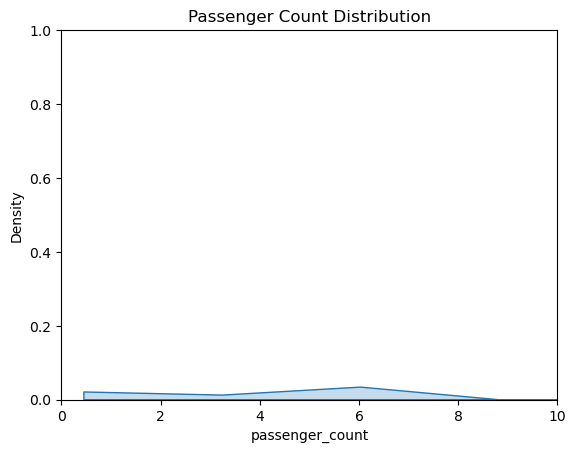

In [52]:
#Looking at the distribution of the passenger count.
kde_plot(df_no_duplicates,'passenger_count',"Passenger Count Distribution", (0,10),(0,1))

In [44]:
df_no_duplicates['passenger_count'].skew()

194.10598751074463

**The distribution is extremely skewed, therefore the missing values can't be replaced with the mean/median.**

**We'll simply impute with an arbitary value '-1'.**

In [30]:
df_no_duplicates['passenger_count']=df_no_duplicates['passenger_count'].fillna(value=-1)

In [31]:
df_no_duplicates[df_no_duplicates['passenger_count']==-1]['hour'].value_counts()[:5]

10    7465
12    7282
11    7064
9     6959
15    6766
Name: hour, dtype: int64

In [32]:
df_no_duplicates[df_no_duplicates['passenger_count']==-1]['vendor'].value_counts()[:5]

VeriFone Inc.                        89483
Creative Mobile Technologies, LLC      737
Name: vendor, dtype: int64

**We can see a very strong relation between the vendor and the number of records where the passenger count is missing.**

**Most of these records were recorded by 'VeriFone Inc.' vendor.**

**Hence, we can say the data is missing at random (MNAR), with some dependance on the vendor.**

In [55]:
df_no_duplicates[df_no_duplicates['passenger_count']==-1]['pu_location'].value_counts()[:5]

Brooklyn,Crown Heights North          2262
Brooklyn,East New York                2047
Manhattan,Central Harlem North        1702
Brooklyn,Prospect-Lefferts Gardens    1504
Manhattan,East Harlem North           1441
Name: pu_location, dtype: int64

**It is also a bit related to the pick-up location, not that much tho.**

#


**Moving to the "extra" column.**

In [44]:
df_no_duplicates['extra'].value_counts()

 0.50    99932
 2.75    85351
 1.00    76333
 5.50     4240
 3.25     2316
 3.75     1921
-0.50      363
 8.25      343
-1.00      192
 4.50      164
-4.50        5
 4.00        2
 0.80        1
Name: extra, dtype: int64

**In this column, there are no instances with a value of '0.' However, when we inspect the 'total_amount' column, it becomes evident that rows with a missing 'extra' column (NaN) are treated as if they have a value of 0.**

**Therefore, the data is not missing at random (MNAR).**

In [33]:
#we'll impute by 0 now.
df_no_duplicates['extra']=df_no_duplicates['extra'].fillna(0)
df_no_duplicates['extra'].isnull().sum()

0

#

**Moving to the 'congestion_surcharge' column.**

In [46]:
df_no_duplicates['congestion_surcharge'].value_counts()

 0.00    323307
 2.75     63373
 2.50       123
 0.75        10
-2.75         6
Name: congestion_surcharge, dtype: int64

**There are other values than the $2.75 and $ 0 which are mentioned in the description, however, the number of these records is very small when being compared to the entire dataset.**

In [57]:
df_no_duplicates[df_no_duplicates['congestion_surcharge'].isnull()]['vendor'].value_counts()

VeriFone Inc.    89377
Name: vendor, dtype: int64

**All the records with missing 'congestion charge' are recorded by VeriFOne Inc. vendor.**

**Therefore the the data is MNAR**

In [48]:
df_no_duplicates['congestion_surcharge'].skew()

1.8126667781552315

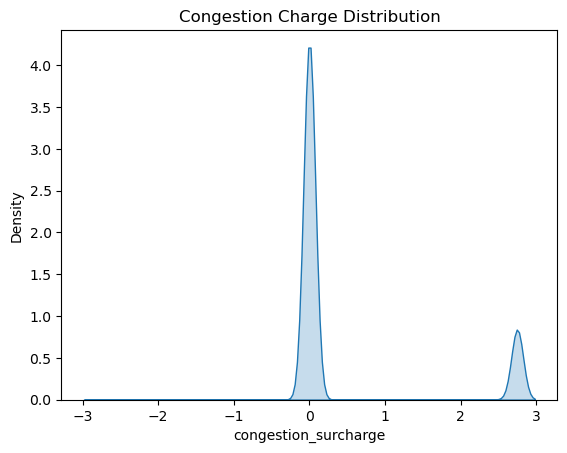

In [54]:
kde_plot(df_no_duplicates,'congestion_surcharge',"Congestion Charge Distribution")

In [49]:
df_no_duplicates['congestion_surcharge'].isnull().groupby(df_no_duplicates['vendor']).value_counts()

vendor                             congestion_surcharge
Creative Mobile Technologies, LLC  False                    64424
VeriFone Inc.                      False                   322395
                                   True                     89377
Name: congestion_surcharge, dtype: int64

In [34]:
df_cleanedd=df_no_duplicates.copy()
df_cleanedd['congestion_surcharge']=df_cleanedd['congestion_surcharge'].fillna(value=1)

**Since the data is MNAR, we have imputed the column with an unused arbitary value which is 1.**

#


**Moving to the "payment_type" column.**

In [110]:
df_cleanedd[['payment_type','total_amount']].groupby('payment_type')['total_amount'].mean()

payment_type
Cash           12.557948
Credit card    17.936665
Dispute         4.664850
No charge       1.286473
Uknown         21.983636
Unknown        34.112428
Name: total_amount, dtype: float64

**No relation between the total amount and the payment type.**

**Here, the data is MCAR, so we'll just add these missing values to the unknown category after merging both the "unknown" & "Unknown" categories together.**

In [35]:
df_cleanedd['payment_type']=df_cleanedd['payment_type'].replace('Uknown', 'Unknown')
df_cleanedd['payment_type'].unique()

array(['Cash', nan, 'Credit card', 'Dispute', 'No charge', 'Unknown'],
      dtype=object)

In [36]:
df_cleanedd['payment_type']=df_cleanedd['payment_type'].fillna('Unknown')
df_cleanedd['payment_type'].isnull().sum()

0

# Detecting & Handling Outliers

In [94]:
df_cleanedd.shape

(476197, 22)

In [96]:
df_cleanedd.columns

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'date', 'hour',
       'day_of_week'],
      dtype='object')

### 

**We will begin by systematically identifying and managing outliers in our initial 4 numerical columns before extending our approach using various functions.**

**Starting with the "passenger_count" column.**

In [97]:
df_cleanedd['passenger_count'].unique()

array([  1.,   2.,   3.,   5.,   4.,   6.,  -1., 555.,   7.,   8.,   9.])

In [98]:
df_cleanedd['passenger_count'].skew()

168.83394259317112

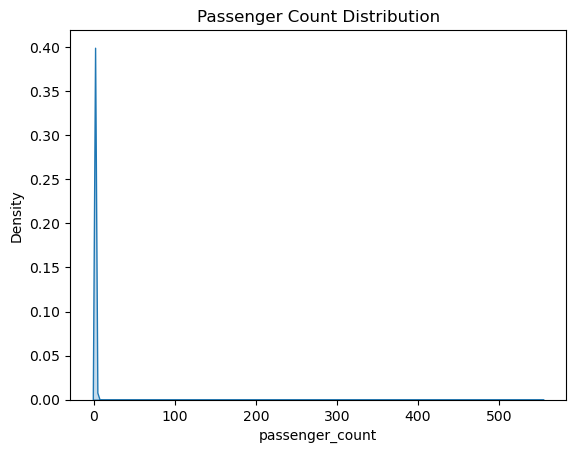

In [99]:
kde_plot(df_cleanedd,'passenger_count',"Passenger Count Distribution")

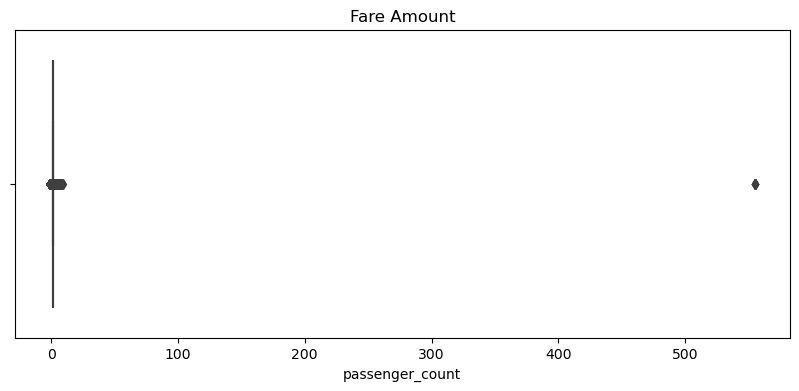

In [100]:
box_plot(df_cleanedd['passenger_count'], df_cleanedd)

In [37]:
def IQR (df, column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    IQR= q3-q1
    cut_off= IQR*1.5
    lower=q1-cut_off
    upper=q3+cut_off
    df_IQR= df[(df[column]>lower)&(df[column]<upper)]
    return df_IQR.shape

In [60]:
IQR(df_cleanedd, 'passenger_count')

(0, 22)

**We've chosen this method in detecting outliers since the data is extremely skewed.**

In [38]:
#handling outliers
def handle_outliers (df, column):
    #df_clean = df.copy()
    median =df[column].median()
    cutoff_pos = df[column].mean() + df[column].std() * 3
    cutoff_neg = df[column].mean() - df[column].std() * 3
    condition_series = ((df[column] > cutoff_pos) | (df[column]< cutoff_neg))
    #df_clean[column] = np.where(condition_series, median,df_clean[column])
    df[column] = np.where(condition_series, median,df[column])
    print(column)
    return df

In [39]:
df_clean=handle_outliers (df_cleanedd, "passenger_count")
df_clean.columns

passenger_count


Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'date', 'hour',
       'day_of_week'],
      dtype='object')

In [63]:
df_clean.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,day_of_week
count,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000
mean,0.873055,3.542588,15.783049,0.844704,0.486167,0.982956,0.317746,0.240373,18.986482,0.554290,13.764419,2.895814
std,1.255643,4.101775,14.101168,1.135349,0.089721,1.981869,2.177937,0.121341,15.621458,0.942658,5.590132,1.867583
min,-1.000000,0.000000,-200.000000,-4.500000,-0.500000,-80.800000,-12.500000,-0.300000,-200.000000,-2.750000,0.000000,0.000000
25%,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.000000,0.000000,10.000000,1.000000
50%,1.000000,2.070000,11.500000,0.500000,0.500000,0.000000,0.000000,0.300000,14.160000,0.000000,14.000000,3.000000
75%,1.000000,4.270000,20.730000,1.000000,0.500000,1.650000,0.000000,0.300000,24.620000,1.000000,18.000000,4.000000
max,7.000000,95.780000,2877.500000,8.250000,0.500000,158.520000,935.500000,0.300000,2878.300000,2.750000,23.000000,6.000000


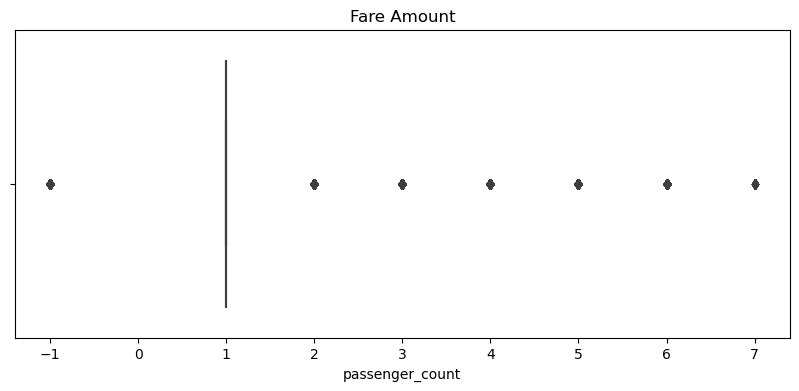

In [109]:
box_plot(df_clean['passenger_count'], df_clean)

In [110]:
df_clean['passenger_count'].skew()

1.2342224410806029

**PERFECTO**

**Where -1 represents the missing values. Also, imputing outliers with median\mean is more reliable than other methods like imputing with 10% & 90%.**

#


**Moving to the "trip_distance" column.**

In [111]:
df_clean['trip_distance'].unique()

array([ 5.88,  0.8 ,  7.5 , ..., 30.43, 36.84, 38.03])

In [112]:
df_clean['trip_distance'].skew()

2.738167652646785

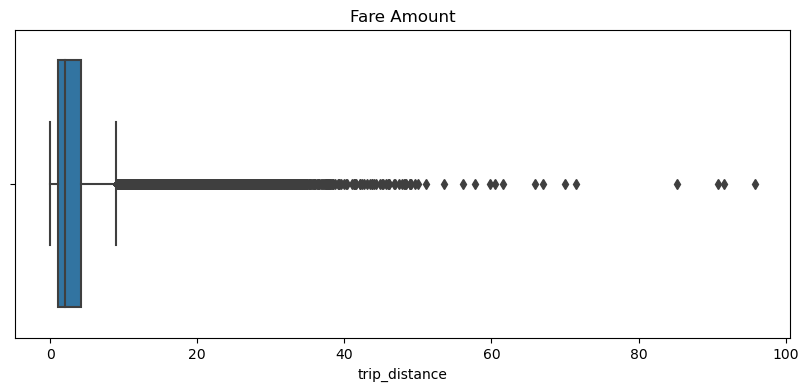

In [113]:
box_plot(df_clean['trip_distance'], df_clean)

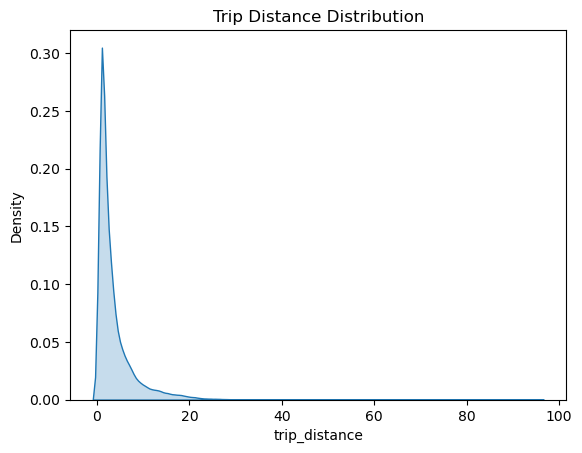

In [114]:
kde_plot(df_clean,'trip_distance',"Trip Distance Distribution")

In [115]:
IQR(df_clean, 'trip_distance')

(434364, 22)

**Not Bad.**

In [116]:
df_clean=handle_outliers (df_clean, "trip_distance")

trip_distance


In [117]:
df_clean.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,day_of_week
count,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000
mean,0.873055,3.072218,15.783049,0.844704,0.486167,0.982956,0.317746,0.240373,18.986482,0.554290,13.764419,2.895814
std,1.255643,2.999457,14.101168,1.135349,0.089721,1.981869,2.177937,0.121341,15.621458,0.942658,5.590132,1.867583
min,-1.000000,0.000000,-200.000000,-4.500000,-0.500000,-80.800000,-12.500000,-0.300000,-200.000000,-2.750000,0.000000,0.000000
25%,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.000000,0.000000,10.000000,1.000000
50%,1.000000,2.070000,11.500000,0.500000,0.500000,0.000000,0.000000,0.300000,14.160000,0.000000,14.000000,3.000000
75%,1.000000,3.900000,20.730000,1.000000,0.500000,1.650000,0.000000,0.300000,24.620000,1.000000,18.000000,4.000000
max,7.000000,15.840000,2877.500000,8.250000,0.500000,158.520000,935.500000,0.300000,2878.300000,2.750000,23.000000,6.000000


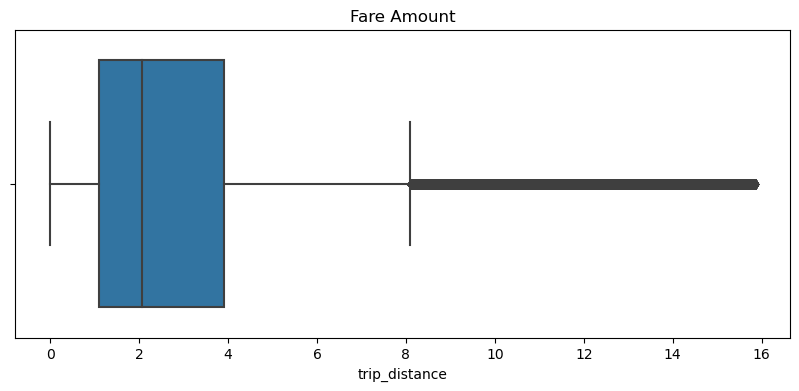

In [119]:
box_plot(df_clean['trip_distance'], df_clean)

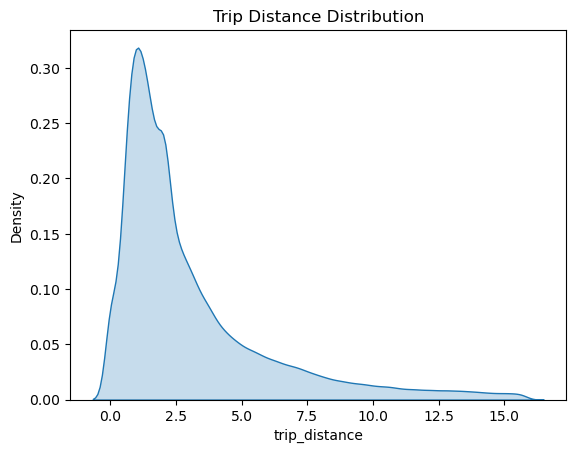

In [118]:
kde_plot(df_clean,'trip_distance',"Trip Distance Distribution")

**Much Better.**

#


**Moving to the "fare_amount" column.**

In [120]:
df_clean['fare_amount'].skew()
df_clean['fare_amount'].describe()

count    476197.000000
mean         15.783049
std          14.101168
min        -200.000000
25%           7.000000
50%          11.500000
75%          20.730000
max        2877.500000
Name: fare_amount, dtype: float64

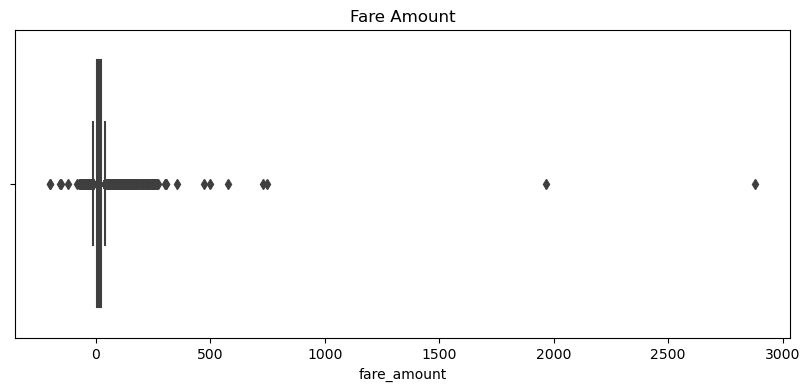

In [121]:
box_plot(df_clean['fare_amount'], df_clean)

In [122]:
IQR(df_clean, 'fare_amount')

(450870, 22)

In [123]:
df_clean=handle_outliers (df_clean, "fare_amount")
df_clean.describe()

fare_amount


,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,day_of_week
count,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000
mean,0.873055,3.072218,15.023877,0.844704,0.486167,0.982956,0.317746,0.240373,18.986482,0.554290,13.764419,2.895814
std,1.255643,2.999457,11.032427,1.135349,0.089721,1.981869,2.177937,0.121341,15.621458,0.942658,5.590132,1.867583
min,-1.000000,0.000000,-26.490000,-4.500000,-0.500000,-80.800000,-12.500000,-0.300000,-200.000000,-2.750000,0.000000,0.000000
25%,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.000000,0.000000,10.000000,1.000000
50%,1.000000,2.070000,11.500000,0.500000,0.500000,0.000000,0.000000,0.300000,14.160000,0.000000,14.000000,3.000000
75%,1.000000,3.900000,20.000000,1.000000,0.500000,1.650000,0.000000,0.300000,24.620000,1.000000,18.000000,4.000000
max,7.000000,15.840000,58.080000,8.250000,0.500000,158.520000,935.500000,0.300000,2878.300000,2.750000,23.000000,6.000000


#


**Moving to the "extra" column.**

In [124]:
df_clean['extra'].skew()

1.5993117765644296

In [126]:
df_clean.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,day_of_week
count,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000
mean,0.873055,3.072218,15.023877,0.844704,0.486167,0.982956,0.317746,0.240373,18.986482,0.554290,13.764419,2.895814
std,1.255643,2.999457,11.032427,1.135349,0.089721,1.981869,2.177937,0.121341,15.621458,0.942658,5.590132,1.867583
min,-1.000000,0.000000,-26.490000,-4.500000,-0.500000,-80.800000,-12.500000,-0.300000,-200.000000,-2.750000,0.000000,0.000000
25%,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.000000,0.000000,10.000000,1.000000
50%,1.000000,2.070000,11.500000,0.500000,0.500000,0.000000,0.000000,0.300000,14.160000,0.000000,14.000000,3.000000
75%,1.000000,3.900000,20.000000,1.000000,0.500000,1.650000,0.000000,0.300000,24.620000,1.000000,18.000000,4.000000
max,7.000000,15.840000,58.080000,8.250000,0.500000,158.520000,935.500000,0.300000,2878.300000,2.750000,23.000000,6.000000


**Almost normally distributed.**

**Then we'll use the z-score method.**

In [40]:
def z_score(df, column):
    z= np.abs(stats.zscore(df[column]))
    filtered_entries= z<3
    df_zscore= df[filtered_entries]
    #print(df.shape)
    print(df_zscore.shape)
    return df_zscore.shape

In [65]:
z_score(df_clean, "extra")

(471445, 22)


(471445, 22)

In [130]:
df_clean=handle_outliers (df_clean, "extra")
df_clean.describe()

extra


,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,day_of_week
count,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000,476197.000000
mean,0.873055,3.072218,15.023877,0.793263,0.486167,0.982956,0.317746,0.240373,18.986482,0.554290,13.764419,2.895814
std,1.255643,2.999457,11.032427,1.024768,0.089721,1.981869,2.177937,0.121341,15.621458,0.942658,5.590132,1.867583
min,-1.000000,0.000000,-26.490000,-1.000000,-0.500000,-80.800000,-12.500000,-0.300000,-200.000000,-2.750000,0.000000,0.000000
25%,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.000000,0.000000,10.000000,1.000000
50%,1.000000,2.070000,11.500000,0.500000,0.500000,0.000000,0.000000,0.300000,14.160000,0.000000,14.000000,3.000000
75%,1.000000,3.900000,20.000000,1.000000,0.500000,1.650000,0.000000,0.300000,24.620000,1.000000,18.000000,4.000000
max,7.000000,15.840000,58.080000,3.750000,0.500000,158.520000,935.500000,0.300000,2878.300000,2.750000,23.000000,6.000000


In [131]:
df_clean.extra.value_counts()

 0.00    205034
 0.50    104686
 2.75     85351
 1.00     76333
 3.25      2316
 3.75      1921
-0.50       363
-1.00       192
 0.80         1
Name: extra, dtype: int64

In [132]:
df_clean.extra.skew()

1.204462518282882

# Generalizing the outliers detection & handling techniques in a single fumnction.

In [41]:
def detecting_and_handling_outliers (df, column):
    df_so_clean=df.copy()
    skew= df[column].skew()
    if ((skew>-2)&(skew<2)):
        zscore_shape=z_score(df, column)
#checking if the output shape is equivalent to the df's shape, then there are no outliers, else handle them.
        if (zscore_shape!=df.shape):
            df_so_clean=handle_outliers (df, column)
    else:
        IQR_shape=IQR(df, column) 
        if (IQR_shape!=df.shape):
            df_so_clean=handle_outliers (df, column)
    
     
    return df_so_clean

In [42]:
numeric_columns= df_cleanedd.select_dtypes(include=['number'])
exclude_columns=['hour', 'day_of_week']   #meaningless
for column in numeric_columns.columns:
    if column not in exclude_columns:
        df_so_clean=detecting_and_handling_outliers(df_cleanedd,column)
    
df_so_clean.describe()

(458978, 22)
passenger_count
trip_distance
fare_amount
(471444, 22)
extra
mta_tax
tip_amount
tolls_amount
(475162, 22)
improvement_surcharge
total_amount
(476190, 22)
congestion_surcharge


,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,hour,day_of_week
count,476196.000000,476196.000000,476196.000000,476196.000000,476196.000000,476196.000000,476196.000000,476196.000000,476196.000000,476196.000000,476196.000000,476196.000000
mean,0.715539,3.072225,15.023909,0.793279,0.499998,0.827965,0.277631,0.241677,18.141101,0.554326,13.764416,2.895818
std,0.904044,2.999457,11.032417,1.024790,0.000725,1.403707,1.253080,0.118724,12.435203,0.942588,5.590138,1.867583
min,-1.000000,0.000000,-26.490000,-1.000000,0.250000,-3.000000,0.000000,0.000000,-27.670000,0.000000,0.000000,0.000000
25%,1.000000,1.100000,7.000000,0.000000,0.500000,0.000000,0.000000,0.300000,9.000000,0.000000,10.000000,1.000000
50%,1.000000,2.070000,11.500000,0.500000,0.500000,0.000000,0.000000,0.300000,14.160000,0.000000,14.000000,3.000000
75%,1.000000,3.900000,20.000000,1.000000,0.500000,1.500000,0.000000,0.300000,24.080000,1.000000,18.000000,4.000000
max,4.000000,15.840000,58.080000,4.000000,0.500000,6.920000,6.750000,0.300000,65.840000,2.750000,23.000000,6.000000


#

**And by this, we've dealt with the outliers in all of our numerical columns.**

**We can easily see that the "mta_tax", "improvement_charge" and "congestion_surcharge" columns had no outliers in the first place.**

# Data transformation and feature engineering

In [43]:
df_so_clean['date']=pd.to_datetime(df_so_clean['date'])

In [44]:
# We'll define custom bin edges for weeks
bin_edges = pd.date_range(start='2019-10-01', end='2019-10-31', freq='7D').tolist()
bin_edges.append(pd.to_datetime('2019-10-29'))

# To Ensure that the bin edges are unique
bin_edges = sorted(set(bin_edges))

# A list of labels for each week
week_labels = [i for i in range(1, len(bin_edges))]

# we're using cut here to divide the date column into weeks
df_so_clean['week_number'] = pd.cut(df_so_clean['date'], bins=bin_edges,labels=week_labels, include_lowest=True)
df_so_clean['date_range'] = pd.cut(df_so_clean['date'], bins=bin_edges,include_lowest=True)


#The previous line displays 'NAN' for days >28, therefore we have to add an extra category for week 5.
df_so_clean['week_number']=df_so_clean['week_number'].cat.add_categories([5])
df_so_clean.loc[df_so_clean['week_number'].isnull(),'week_number']=5


df_so_clean.sample(20)


,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,date,hour,day_of_week,week_number,date_range
76596,VeriFone Inc.,2019-10-06 16:05:02,2019-10-06 16:18:10,N,Standard rate,"Manhattan,Central Park","Manhattan,Midtown North",1.0,2.12,10.50,...,0.3,17.56,Credit card,Street-hail,2.75,2019-10-06,16,6,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
246489,VeriFone Inc.,2019-10-20 02:56:16,2019-10-20 03:11:15,N,Standard rate,"Queens,Elmhurst","Queens,Corona",2.0,2.22,11.00,...,0.3,12.30,Cash,Street-hail,0.00,2019-10-20,2,6,3,"(2019-10-15, 2019-10-22]"
258587,VeriFone Inc.,2019-10-21 10:43:31,2019-10-21 10:52:51,N,Standard rate,"Manhattan,Morningside Heights","Manhattan,Upper West Side South",1.0,2.23,9.50,...,0.3,15.66,Credit card,Street-hail,2.75,2019-10-21,10,0,3,"(2019-10-15, 2019-10-22]"
332868,VeriFone Inc.,2019-10-27 10:06:32,2019-10-27 10:13:22,N,Standard rate,"Queens,Astoria","Queens,Astoria",1.0,1.02,6.50,...,0.3,7.30,Cash,Street-hail,0.00,2019-10-27,10,6,4,"(2019-10-22, 2019-10-29]"
414896,VeriFone Inc.,2019-10-11 15:33:00,2019-10-11 15:33:00,M,Unknown,"Manhattan,Upper East Side South","Manhattan,Upper East Side South",-1.0,0.00,37.72,...,0.3,38.52,Unknown,Unknown,1.00,2019-10-11,15,4,2,"(2019-10-08, 2019-10-15]"
447591,VeriFone Inc.,2019-10-23 11:05:00,2019-10-23 11:39:00,M,Unknown,"Brooklyn,Sunset Park East","Brooklyn,Red Hook",-1.0,4.90,21.17,...,0.0,24.42,Unknown,Unknown,1.00,2019-10-23,11,2,4,"(2019-10-22, 2019-10-29]"
343079,VeriFone Inc.,2019-10-28 11:02:54,2019-10-28 11:10:37,N,Standard rate,"Queens,Elmhurst","Queens,Rego Park",1.0,1.36,7.50,...,0.3,8.30,Cash,Street-hail,0.00,2019-10-28,11,0,4,"(2019-10-22, 2019-10-29]"
247784,"Creative Mobile Technologies, LLC",2019-10-20 09:05:24,2019-10-20 09:11:59,N,Standard rate,"Manhattan,Manhattanville","Manhattan,Central Harlem",1.0,1.20,6.50,...,0.3,9.00,Credit card,Street-hail,0.00,2019-10-20,9,6,3,"(2019-10-15, 2019-10-22]"
301007,VeriFone Inc.,2019-10-24 20:55:28,2019-10-24 21:00:40,N,Standard rate,"Queens,Jamaica","Queens,Briarwood/Jamaica Hills",2.0,1.36,6.00,...,0.3,7.30,Cash,Street-hail,0.00,2019-10-24,20,3,4,"(2019-10-22, 2019-10-29]"
366651,"Creative Mobile Technologies, LLC",2019-10-30 12:54:20,2019-10-30 13:30:46,N,Standard rate,"Brooklyn,Starrett City","Manhattan,Financial District North",1.0,0.00,49.20,...,0.3,50.00,Credit card,Street-hail,0.00,2019-10-30,12,2,5,NaN


In [83]:
df_so_clean['date_range'].unique()
df_so_clean['week_number'].unique()

[1, 4, 2, 3, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

# Encoding

In [45]:
#creating a new dataframe without the pickup/dropoff date columns.
dataframe = df_so_clean.copy()
dataframe=dataframe.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'],axis=1)
dataframe.head()

,vendor,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,date,hour,day_of_week,week_number,date_range
0,VeriFone Inc.,N,Standard rate,"Brooklyn,Greenpoint","Queens,Rego Park",1.0,5.88,18.0,0.50,0.5,...,0.3,19.30,Cash,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
1,"Creative Mobile Technologies, LLC",N,Standard rate,"Manhattan,Central Park","Manhattan,Yorkville West",1.0,0.80,5.0,3.25,0.5,...,0.3,9.05,Cash,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
2,"Creative Mobile Technologies, LLC",N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Sunset Park West",2.0,7.50,21.5,0.50,0.5,...,0.3,22.80,Cash,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
3,"Creative Mobile Technologies, LLC",N,Standard rate,"Brooklyn,Park Slope","Brooklyn,Park Slope",1.0,0.90,5.5,0.50,0.5,...,0.3,6.80,Unknown,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
4,VeriFone Inc.,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Prospect-Lefferts Gardens",1.0,2.52,10.0,0.50,0.5,...,0.3,13.56,Credit card,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"


In [46]:
def label_encoding(df,column):
    result=df.copy()
    if (result.dtypes[column]==object): #categorical column
        le=preprocessing.LabelEncoder()
        result[column]=le.fit_transform(result[column])
    return result

In [47]:
#we'll apply the label encoding function on the "vendor" column since it only has to values although it's not ordinal.
encoded_data= label_encoding(dataframe, "vendor")
encoded_data.head(7)

,vendor,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,date,hour,day_of_week,week_number,date_range
0,1,N,Standard rate,"Brooklyn,Greenpoint","Queens,Rego Park",1.0,5.88,18.0,0.50,0.5,...,0.3,19.30,Cash,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
1,0,N,Standard rate,"Manhattan,Central Park","Manhattan,Yorkville West",1.0,0.80,5.0,3.25,0.5,...,0.3,9.05,Cash,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
2,0,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Sunset Park West",2.0,7.50,21.5,0.50,0.5,...,0.3,22.80,Cash,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
3,0,N,Standard rate,"Brooklyn,Park Slope","Brooklyn,Park Slope",1.0,0.90,5.5,0.50,0.5,...,0.3,6.80,Unknown,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
4,1,N,Standard rate,"Brooklyn,Fort Greene","Brooklyn,Prospect-Lefferts Gardens",1.0,2.52,10.0,0.50,0.5,...,0.3,13.56,Credit card,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
5,1,N,Standard rate,"Brooklyn,Downtown Brooklyn/MetroTech","Brooklyn,Clinton Hill",1.0,1.47,8.0,0.50,0.5,...,0.3,11.16,Credit card,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"
6,0,N,Standard rate,"Queens,Astoria","Queens,Old Astoria",1.0,0.60,4.0,0.50,0.5,...,0.3,6.30,Credit card,Street-hail,0.0,2019-10-01,0,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]"


# 
**And now we'll move to the columns with exactly 3 categories.**

In [48]:
def one_hot_encoding(df, column):
    result=df.copy()
    #Encoding k-1 varaiables, and no need to add a column indicating null entries since they've already been imputed with "M".
    one_hot = pd.get_dummies(result, columns=[column],drop_first=True,prefix=[column])
    return one_hot

**The "store_and_fwd_flag" & "trip_type" columns.**

**we'll apply the one-hot encoding on it since the data is not ordinal, but we'll encode only 2 variables (k-1).**

In [49]:
new_encoded_data = one_hot_encoding(encoded_data, 'store_and_fwd_flag')
new_encoded_data = one_hot_encoding(new_encoded_data, 'trip_type')

new_encoded_data.sample(10)

,vendor,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,congestion_surcharge,date,hour,day_of_week,week_number,date_range,store_and_fwd_flag_Y,store_and_fwd_flag_M,trip_type_Street-hail,trip_type_Unknown
62369,1,Standard rate,"Manhattan,Central Harlem North","Manhattan,East Harlem South",1.0,2.57,11.5,0.0,0.5,0.00,...,0.0,2019-10-05,15,5,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]",0,0,1,0
320937,1,Standard rate,"Queens,Elmhurst/Maspeth","Queens,Astoria",3.0,1.99,8.5,0.0,0.5,0.00,...,0.0,2019-10-26,12,5,4,"(2019-10-22, 2019-10-29]",0,0,1,0
281280,1,Standard rate,"Manhattan,East Harlem North","Bronx,West Concourse",1.0,1.50,8.0,0.0,0.5,0.00,...,0.0,2019-10-23,10,2,4,"(2019-10-22, 2019-10-29]",0,0,1,0
344904,1,Standard rate,"Queens,Rego Park","Queens,Jackson Heights",1.0,1.94,12.5,0.0,0.5,2.66,...,0.0,2019-10-28,15,0,4,"(2019-10-22, 2019-10-29]",0,0,1,0
241263,1,Standard rate,"Manhattan,East Harlem South","Bronx,Soundview/Bruckner",1.0,5.91,19.0,0.0,0.5,0.00,...,0.0,2019-10-19,18,5,3,"(2019-10-15, 2019-10-22]",0,0,1,0
67106,1,Standard rate,"Manhattan,Hamilton Heights","Manhattan,East Harlem South",1.0,3.43,13.5,0.5,0.5,1.00,...,0.0,2019-10-05,21,5,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]",0,0,1,0
2318,1,Standard rate,"Manhattan,East Harlem North","Manhattan,East Harlem North",1.0,3.02,13.0,0.0,0.5,0.00,...,0.0,2019-10-01,9,1,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]",0,0,1,0
378679,1,Standard rate,"Manhattan,East Harlem North","Queens,Steinway",1.0,5.51,17.5,0.0,0.5,0.00,...,0.0,2019-10-31,12,3,5,NaN,0,0,1,0
340260,0,Standard rate,"Queens,Jackson Heights","Queens,Jackson Heights",1.0,0.00,22.2,0.0,0.5,0.00,...,0.0,2019-10-28,6,0,4,"(2019-10-22, 2019-10-29]",0,0,1,0
86700,0,Standard rate,"Brooklyn,Boerum Hill","Brooklyn,Brooklyn Navy Yard",1.0,1.30,10.5,0.0,0.5,0.00,...,0.0,2019-10-07,14,0,1,"(2019-09-30 23:59:59.999999999, 2019-10-08]",0,0,1,0


#

**Moving to the columns with more than 3 categories, we'll apply One Hot Encoding of Frequent Categories which is more practical space wise.**

In [114]:
df_so_clean['payment_type'].value_counts()

Credit card    208538
Cash           164918
Unknown        100184
No charge        1690
Dispute           866
Name: payment_type, dtype: int64

In [115]:
df_so_clean['rate_type'].value_counts()

Standard rate            376244
Unknown                   89383
Negotiated fare            9154
JFK                         882
Nassau or Westchester       319
Newark                      210
Group ride                    4
Name: rate_type, dtype: int64

**We can clearly observe that the first 3 categories in the "rate_type" & "payment_type" columns contain the majority of the data.**

In [50]:
# func that calculates the top x most frequent values in a categorical feature.
# inputs, dataframe(df), feature/column name (variable) and top x values(how_many)
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]
# manually encode the most frequent values in a catgeorical feature.
def one_hot_encode(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable + '_' + label] = np.where(
            df[variable] == label, 1, 0) 

In [51]:
df_copy = new_encoded_data.copy()
columns= df_copy[['rate_type','payment_type']]
for col in columns:
    top_x = calculate_top_categories(df_copy,col,3)
    one_hot_encode(df_copy,col,top_x)

df_copy.drop('rate_type', axis=1, inplace=True)
df_copy.sample(7)

,vendor,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,store_and_fwd_flag_Y,store_and_fwd_flag_M,trip_type_Street-hail,trip_type_Unknown,rate_type_Standard rate,rate_type_Unknown,rate_type_Negotiated fare,payment_type_Credit card,payment_type_Cash,payment_type_Unknown
367489,1,"Unknown,NV","Unknown,NV",1.0,0.29,7.0,0.0,0.5,0.00,0.0,...,0,0,0,0,0,0,1,1,0,0
111677,1,"Manhattan,Morningside Heights","Manhattan,Central Harlem",1.0,1.62,10.5,0.0,0.5,3.39,0.0,...,0,0,1,0,1,0,0,1,0,0
11479,1,"Queens,Rego Park","Queens,Forest Hills",1.0,0.99,6.5,0.5,0.5,0.00,0.0,...,0,0,1,0,1,0,0,0,1,0
269858,1,"Manhattan,Morningside Heights","Manhattan,East Harlem South",1.0,2.52,11.5,0.0,0.5,1.00,0.0,...,0,0,1,0,1,0,0,1,0,0
240348,0,"Brooklyn,Sheepshead Bay","Brooklyn,Sheepshead Bay",1.0,2.10,8.5,0.0,0.5,0.00,0.0,...,0,0,1,0,1,0,0,0,0,1
241435,1,"Queens,Jackson Heights","Queens,Jackson Heights",2.0,1.52,8.0,0.0,0.5,1.76,0.0,...,0,0,1,0,1,0,0,1,0,0
114156,1,"Queens,Elmhurst","Queens,Corona",1.0,1.16,7.0,1.0,0.5,0.00,0.0,...,0,0,1,0,1,0,0,0,1,0


# Normalization

# 
**After inspecting the skewness of our numerical columns, only the "mta_tax" & "tolls_amount" need to be normalized for having skew values <-2 or >2.**

**We've chosen this range, although columns with skew values = 2 may not be quite normally dist. yet close.**

**We're using here the "boxcox" since it normalizes the data with no data loss & it is a parameter free technique.**

In [52]:
def normalize(df, column):
    result=df.copy()
    skew= result[column].skew()
    #checking whether the column is nearly normally dist. or not.
    if ((skew<-2)or(skew>2)):
        
        #ensuring there are no -ve/0 values by shifting the entire column by (1-min_value) to avoid 0 values.
        if(result[column].min()<=0):
            constant_shift = 1 - result[column].min()
            result[column+"_shifted"]=result[column]+constant_shift
            print("Min value after shift:", result[column+"_shifted"].min())
            
            column_to_transform = column + "_shifted"
        else:
            column_to_transform = column
            
            
        #normalizing using the box-plot.
        normalized_pledges = stats.boxcox( result[column_to_transform] )[0]
        
        result[column] = normalized_pledges
        
  
            
        # plot both together to compare
        fig, ax=plt.subplots(1,2)
        sns.distplot(df[column], ax=ax[0])
        ax[0].set_title("Original Data")
        sns.distplot(normalized_pledges, ax=ax[1])
        ax[1].set_title("Normalized data")
        return result

**Starting with the "mta_tax" column.**

In [255]:
df_copy.mta_tax.value_counts()

0.50    476192
0.25         4
Name: mta_tax, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:935: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2884: RuntimeWarning: invalid value encountered in scalar divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2416: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)
C:\ProgramData\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2417: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = (x - v) * (fx - fw)
C:\Users\2018\AppData\Local\Temp\ipykernel_9336\1282366654.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-

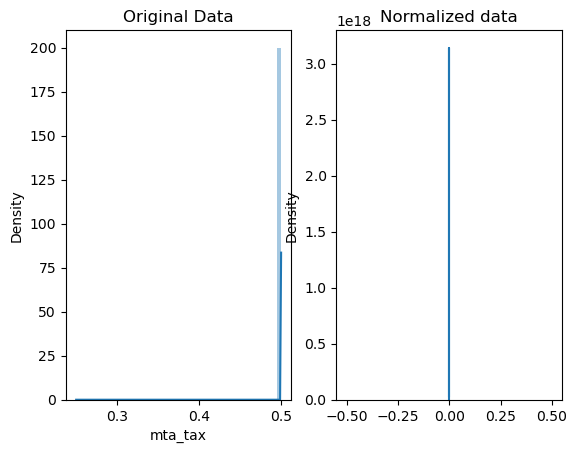

In [53]:
df_normalized=normalize(df_copy, 'mta_tax')

In [254]:
skew1=df_copy.mta_tax.skew()
skew2=df_normalized.mta_tax.skew()
skew1,skew2

(-345.03152029010414, 0)

**The skewness has reduced from 345 to 0, since almost all of the values were the same except for 4 only that caused all of this skewness in the first place.**

**Moving to the "tolls_amount".**

Min value after shift: 1.0


C:\Users\2018\AppData\Local\Temp\ipykernel_9336\1282366654.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=ax[0])
C:\Users\2018\AppData\Local\Temp\ipykernel_9336\1282366654.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized_pledges, ax=ax[1])


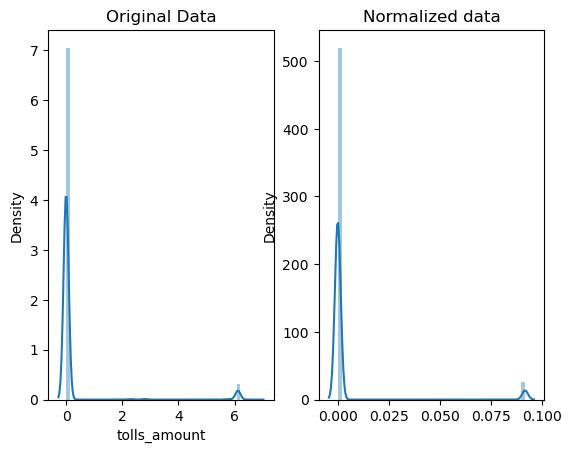

In [54]:
df_normalized2=normalize(df_normalized, 'tolls_amount')

In [249]:
df_normalized2['tolls_amount'].skew()

4.201774751985506

**The skewness of the "tolls_amount" has reduced a bit, still not perfectly normally distributed tho.**

#


**We'll now try the "log transformation" method to try to reduce the skewness of the "tolls_amount" as much as possible.**

In [256]:
def log_transformation(df, column_name):
    result = df.copy()
    
    # Apply log10 transformation to the specified column
    result[column_name] = np.log10(result[column_name] + 1)  # Adding 1 to avoid log(0)

    
    # Plot the original and transformed data
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.distplot(df[column_name], ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(result[column_name], ax=ax[1])
    ax[1].set_title("Transformed Data")
    
    return result

C:\Users\2018\AppData\Local\Temp\ipykernel_7848\2979521855.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name], ax=ax[0])
C:\Users\2018\AppData\Local\Temp\ipykernel_7848\2979521855.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[column_name], ax=ax[1])


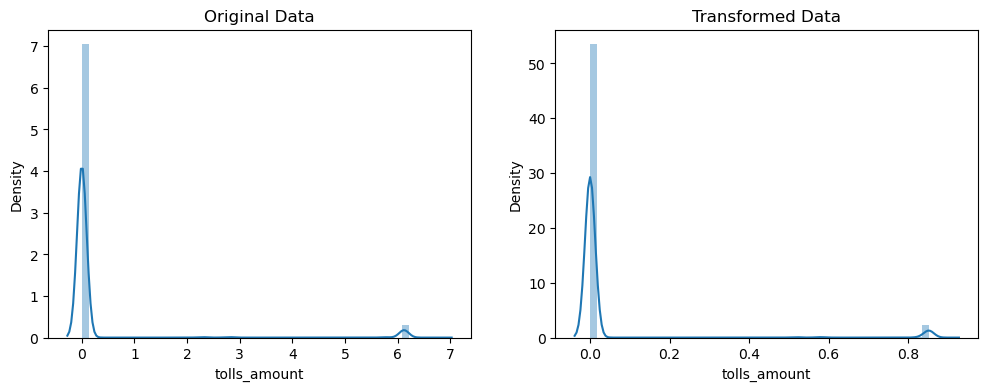

In [257]:
df_neww=log_transformation(df_copy, "tolls_amount")

In [260]:
df_neww['tolls_amount'].skew()

4.277664862972541

**Unfortunately, this technique performed worse than the "boxcox".**

# Feature Engineering

**Adding 2 more columns as required to add more info, in addition to the "day_of_week" & "hour" columns which have been already added.**

In [55]:
#Indicating whether the trip was on a weekend or not.
df_normalized2.loc[df_normalized2['day_of_week'].isin([5,6]), 'weekend']=1
df_normalized2.loc[df_normalized2['weekend'].isnull(), 'weekend']=0

df_normalized2.sample(7)

,vendor,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,trip_type_Street-hail,trip_type_Unknown,rate_type_Standard rate,rate_type_Unknown,rate_type_Negotiated fare,payment_type_Credit card,payment_type_Cash,payment_type_Unknown,tolls_amount_shifted,weekend
240124,1,"Brooklyn,Boerum Hill","Brooklyn,Park Slope",1.0,0.93,6.50,0.00,-0.000978,2.00,0.000000,...,1,0,1,0,0,1,0,0,1.00,1.0
363351,1,"Manhattan,Morningside Heights","Manhattan,Central Harlem",1.0,0.73,4.50,0.00,-0.000978,0.00,0.000000,...,1,0,1,0,0,0,1,0,1.00,0.0
339568,0,"Queens,Jackson Heights","Queens,Jackson Heights",1.0,1.20,7.50,0.50,-0.000978,0.00,0.000000,...,1,0,1,0,0,0,1,0,1.00,1.0
376025,1,"Brooklyn,Park Slope","Brooklyn,Park Slope",1.0,0.20,3.00,0.00,-0.000978,0.00,0.000000,...,1,0,1,0,0,0,1,0,1.00,0.0
409900,1,"Manhattan,East Harlem South","Queens,Flushing Meadows-Corona Park",-1.0,11.46,33.98,0.50,-0.000978,0.00,0.091515,...,0,1,0,1,0,0,0,1,7.12,0.0
427365,1,"Brooklyn,Boerum Hill","Brooklyn,Crown Heights South",-1.0,2.88,20.73,2.75,-0.000978,0.00,0.000000,...,0,1,0,1,0,0,0,1,1.00,0.0
376396,1,"Manhattan,East Harlem South","Manhattan,East Harlem North",1.0,1.35,6.50,0.00,-0.000978,1.46,0.000000,...,1,0,1,0,0,1,0,0,1.00,0.0


#


**Regarding our second feature, we'll discretize the "fare_amount" to know whether it was "low, average or high".**

In [56]:
df_normalized2['fare_band']=pd.cut(df_normalized2['fare_amount'],3)
df_normalized2[['fare_band', 'total_amount']].groupby(['fare_band'], as_index=False).mean().sort_values(by='fare_band', ascending=True)

,fare_band,total_amount
0,"(-26.575, 1.7]",-3.180477
1,"(1.7, 29.89]",15.117998
2,"(29.89, 58.08]",44.337262


In [57]:
df_normalized2.loc[ df_normalized2['fare_amount'] <= 1.7, 'fare_amount'] = 0
df_normalized2.loc[(df_normalized2['fare_amount'] > 1.7) & (df_normalized2['fare_amount'] <= 29.89), 'fare_amount'] = 1
df_normalized2.loc[ df_normalized2['fare_amount'] > 29.89, 'fare_amount']=2
df_normalized2.tail(7)

,vendor,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,trip_type_Unknown,rate_type_Standard rate,rate_type_Unknown,rate_type_Negotiated fare,payment_type_Credit card,payment_type_Cash,payment_type_Unknown,tolls_amount_shifted,weekend,fare_band
476378,1,"Brooklyn,Crown Heights North","Manhattan,UN/Turtle Bay South",-1.0,10.08,2.0,2.75,-0.000978,0.0,0.000000,...,1,0,1,0,0,0,1,1.00,0.0,"(29.89, 58.08]"
476379,1,"Queens,North Corona","Bronx,Co-Op City",-1.0,11.77,2.0,2.75,-0.000978,0.0,0.091515,...,1,0,1,0,0,0,1,7.12,0.0,"(29.89, 58.08]"
476380,1,"Queens,Hollis","Brooklyn,Clinton Hill",-1.0,15.49,2.0,2.75,-0.000978,0.0,0.000000,...,1,0,1,0,0,0,1,1.00,0.0,"(29.89, 58.08]"
476382,1,"Queens,Jackson Heights","Bronx,Kingsbridge Heights",-1.0,0.00,2.0,2.75,-0.000978,0.0,0.091515,...,1,0,1,0,0,0,1,7.12,0.0,"(29.89, 58.08]"
476383,1,"Brooklyn,Crown Heights North","Brooklyn,Starrett City",-1.0,3.90,1.0,2.75,-0.000978,0.0,0.000000,...,1,0,1,0,0,0,1,1.00,0.0,"(1.7, 29.89]"
476384,1,"Brooklyn,East New York","Brooklyn,Canarsie",-1.0,3.08,1.0,2.75,-0.000978,0.0,0.000000,...,1,0,1,0,0,0,1,1.00,0.0,"(1.7, 29.89]"
476385,1,"Queens,Corona","Queens,South Jamaica",-1.0,6.84,2.0,2.75,-0.000978,0.0,0.000000,...,1,0,1,0,0,0,1,1.00,0.0,"(29.89, 58.08]"


#


**Create a function to generalize the previous steps and use it on any of our numerical columns.**

In [58]:
def categorize_numerical_column(df1, column_name, num_bins):
    df=df1.copy()
    # Creating a new column with categorical values
    df[f'{column_name}_band'] = pd.cut(df[column_name], num_bins)
    
    # Define the bin labels
    bin_labels = list(range(num_bins))
    
    # Mapping the original column to the bin labels
    df[column_name] = pd.cut(df[column_name], bins=num_bins, labels=bin_labels)
    
    # Removing the temporary categorical column
    #df.drop([f'{column_name}_band'], axis=1, inplace=True)
    return df

In [59]:
#categorizing the "total_amount".
df_normalized3 = categorize_numerical_column(df_normalized2, "total_amount", 4)
df_normalized3.total_amount.unique()

[2, 1, 3, 0]
Categories (4, int64): [0 < 1 < 2 < 3]

In [60]:
#categorizing the "trip_distance & "passenger_count" as well.
df_normalized3 = categorize_numerical_column(df_normalized3, "trip_distance", 4)

In [61]:
df_normalized3.head()

,vendor,pu_location,do_location,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,...,rate_type_Negotiated fare,payment_type_Credit card,payment_type_Cash,payment_type_Unknown,tolls_amount_shifted,weekend,fare_band,total_amount_band,trip_distance_band,passenger_count_band
0,1,"Brooklyn,Greenpoint","Queens,Rego Park",1,1,1.0,0.50,-0.000978,0.00,0.0,...,0,0,1,0,1.0,0.0,"(1.7, 29.89]","(19.085, 42.463]","(3.96, 7.92]","(0.25, 1.5]"
1,0,"Manhattan,Central Park","Manhattan,Yorkville West",1,0,1.0,3.25,-0.000978,0.00,0.0,...,0,0,1,0,1.0,0.0,"(1.7, 29.89]","(-4.292, 19.085]","(-0.0158, 3.96]","(0.25, 1.5]"
2,0,"Brooklyn,Williamsburg (North Side)","Brooklyn,Sunset Park West",2,1,1.0,0.50,-0.000978,0.00,0.0,...,0,0,1,0,1.0,0.0,"(1.7, 29.89]","(19.085, 42.463]","(3.96, 7.92]","(1.5, 2.75]"
3,0,"Brooklyn,Park Slope","Brooklyn,Park Slope",1,0,1.0,0.50,-0.000978,0.00,0.0,...,0,0,0,1,1.0,0.0,"(1.7, 29.89]","(-4.292, 19.085]","(-0.0158, 3.96]","(0.25, 1.5]"
4,1,"Brooklyn,Fort Greene","Brooklyn,Prospect-Lefferts Gardens",1,0,1.0,0.50,-0.000978,2.26,0.0,...,0,1,0,0,1.0,0.0,"(1.7, 29.89]","(-4.292, 19.085]","(-0.0158, 3.96]","(0.25, 1.5]"


# Lookup Table

**I think i should have written the table's code elsewhere & just upload the csv file here, but here are both of them anyways.**

In [82]:
# Function to create a lookup table.
def lookup_table(label_encoded_columns, imputed_columns, original_imputed_columns, discretized_numerical_columns, discretized_numerical_columns_cats, df1, df2, df3, df4,df5):

    lookup_tables = {}

    #Creating a look table for "label-encoded" columns.
    for column in label_encoded_columns:
        lookup_table = pd.DataFrame({
        'Column_name': column,
        
        'Original_Value': df1[column].unique(),
        #'Encoded_Values': [f'{i}' for i in range(df_copy[column].nunique())]
        'Imputed_Value': (df2[column].unique())
        
    })
    lookup_tables[column] = lookup_table

    #Creating a table for columns which had "missing" values and been imputed.
    for column, original_column in zip(imputed_columns, original_imputed_columns):
   
        imputed_values = [value for value in df3[column].unique() if value not in df4[original_column].unique()]

        if len(imputed_values) > 0:
            lookup_table = pd.DataFrame({
                'Column_name': column,
                'Original_Value': "null",
                'Imputed_Value': imputed_values,
            })

        lookup_tables[column] = lookup_table
        
        #Creating a table for the numerical columns that have been discretized
    for numerical_column, ranges in zip(discretized_numerical_columns, discretized_numerical_columns_cats):
        my_ranges= df5[ranges].unique().sort_values(ascending=True)
        imputed_values2= [f'{i}' for i in range(df5[ranges].nunique())]
        bands= [f'{i}' for i in (my_ranges)]
        if len(imputed_values2) > 0:
            lookup_table = pd.DataFrame({
                'Column_name': numerical_column,
                'Original_Value': bands,
                'Imputed_Value': imputed_values2,
            })

        lookup_tables[numerical_column] = lookup_table
        

# Concatenating all the lookup tables into a single table
    final_lookup_table = pd.concat(lookup_tables)
    final_lookup_table = final_lookup_table.reset_index(drop=True)
    return final_lookup_table

In [83]:
label_encoded_columns=['vendor'] #the only column that was label encoded, the rest were one-hot encoded.
imputed_columns = ['store_and_fwd_flag','congestion_surcharge', 'extra', 'passenger_count']  #columns with missing values
original_imputed_columns= ['store and fwd flag', 'congestion surcharge', 'extra', 'passenger count']  #original names of these cols.
discretized_numerical_columns=['fare_amount',"total_amount", 'trip_distance']
discretized_numerical_columns_cats=['fare_band',"total_amount_band", 'trip_distance_band']

lookup_table=lookup_table(label_encoded_columns, imputed_columns, original_imputed_columns,discretized_numerical_columns, discretized_numerical_columns_cats, df_no_duplicates, df_copy, df_cleanedd, df_new,df_normalized3)
print(lookup_table)

             Column_name                     Original_Value Imputed_Value
0                 vendor                      VeriFone Inc.             1
1                 vendor  Creative Mobile Technologies, LLC             0
2     store_and_fwd_flag                               null             M
3   congestion_surcharge                               null           1.0
4                  extra                               null           0.0
5        passenger_count                               null          -1.0
6            fare_amount                     (-26.575, 1.7]             0
7            fare_amount                       (1.7, 29.89]             1
8            fare_amount                     (29.89, 58.08]             2
9           total_amount                  (-27.764, -4.292]             0
10          total_amount                   (-4.292, 19.085]             1
11          total_amount                   (19.085, 42.463]             2
12          total_amount              

In [84]:
lookup_table.to_csv(r'D:\Semester 9\Data Engineering\M1\lookup_table_green_taxis.csv', index=False)

In [89]:
lookup_table= pd.read_csv(r'D:\Semester 9\Data Engineering\M1\lookup_table_green_taxis.csv')
lookup_table

,Column_name,Original_Value,Imputed_Value
0,vendor,VeriFone Inc.,1
1,vendor,"Creative Mobile Technologies, LLC",0
2,store_and_fwd_flag,NaN,M
3,congestion_surcharge,NaN,1.0
4,extra,NaN,0.0
5,passenger_count,NaN,-1.0
6,fare_amount,"(-26.575, 1.7]",0
7,fare_amount,"(1.7, 29.89]",1
8,fare_amount,"(29.89, 58.08]",2
9,total_amount,"(-27.764, -4.292]",0


# GPS Coordinates

In [90]:
gps= pd.read_csv(r'D:\Semester 9\Data Engineering\M1\GPS_Coordinates.csv')
gps

,display_name,lat,lon
0,"The Bronx, City of New York, New York, United ...",40.846651,-73.878594
1,"Brooklyn, Kings County, City of New York, New ...",40.652601,-73.949721
2,"Kings County, City of New York, New York, Unit...",40.652601,-73.949721
3,"Brooklyn, Poweshiek County, Iowa, United States",41.728646,-92.445594
4,"Brooklyn, Saint Clair County, Illinois, United...",38.657181,-90.167058
5,"Brooklyn, Cuyahoga County, Ohio, 44144, United...",41.439754,-81.740556
6,"Brooklyn, Columbia Township, Jackson County, M...",42.105874,-84.248282
7,"Brooklyn, Northeastern Connecticut Planning Re...",41.788154,-71.949796
8,"Brooklyn, Green County, Wisconsin, United States",42.852356,-89.369167
9,"Brooklyn, Town of Three Rivers, Kings County, ...",46.093597,-62.670432


# Final Steps

**Our final df:**
**>>we'll now drop many columns to clean our df:**

**1)'pu_location', 'do_location'>>>gps coordinates have been already extracted.**

**2)'fare_band', 'total_amount_band','trip_distance_band', 'passenger_count_band'>>> served their purpose in the discretization.**

**3)'tolls_amount_shifted'>>> no need.**

**4)'date'>>> served its purpose as well.**

**5)'passenger_count'>>>not useful.**

In [95]:
df_final=df_normalized3.drop(['pu_location', 'do_location','fare_band', 'total_amount_band','trip_distance_band', 'passenger_count_band','tolls_amount_shifted','date'],axis=1)
df_final=df_final.drop(['passenger_count'],axis=1) #not particularly useful
df_final

,vendor,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,...,store_and_fwd_flag_M,trip_type_Street-hail,trip_type_Unknown,rate_type_Standard rate,rate_type_Unknown,rate_type_Negotiated fare,payment_type_Credit card,payment_type_Cash,payment_type_Unknown,weekend
0,1,1,1.0,0.50,-0.000978,0.00,0.000000,0.3,2,Cash,...,0,1,0,1,0,0,0,1,0,0.0
1,0,0,1.0,3.25,-0.000978,0.00,0.000000,0.3,1,Cash,...,0,1,0,1,0,0,0,1,0,0.0
2,0,1,1.0,0.50,-0.000978,0.00,0.000000,0.3,2,Cash,...,0,1,0,1,0,0,0,1,0,0.0
3,0,0,1.0,0.50,-0.000978,0.00,0.000000,0.3,1,Unknown,...,0,1,0,1,0,0,0,0,1,0.0
4,1,0,1.0,0.50,-0.000978,2.26,0.000000,0.3,1,Credit card,...,0,1,0,1,0,0,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476380,1,3,2.0,2.75,-0.000978,0.00,0.000000,0.0,3,Unknown,...,1,0,1,0,1,0,0,0,1,0.0
476382,1,0,2.0,2.75,-0.000978,0.00,0.091515,0.0,3,Unknown,...,1,0,1,0,1,0,0,0,1,0.0
476383,1,0,1.0,2.75,-0.000978,0.00,0.000000,0.0,2,Unknown,...,1,0,1,0,1,0,0,0,1,0.0
476384,1,0,1.0,2.75,-0.000978,0.00,0.000000,0.0,1,Unknown,...,1,0,1,0,1,0,0,0,1,0.0


In [97]:
df_final=df_final.to_csv(r'D:\Semester 9\Data Engineering\M1\green_trip_data_2019-10_clean.csv', index=False)

# Bonus

In [103]:
#!pip install pyarrow
df_finalll=df_final.copy()
df_finalll['date_range'] = df_final['date_range'].astype(str)
df_finalll.to_parquet(r'D:\Semester 9\Data Engineering\M1\green_trip_data_2019-10_clean.parquet', index=False)